# Dacon 국토교통 빅데이터 온라인 해커톤 경진대회  
## Introduction  
- 코로나 종식 이후 많은 사람들이 통근 또는 통학을 위해 대학교나 직장의 밀집도가 높은 서울로 이사를 할 것으로 예측이 되며 이에 따라 부동산 시장 안정을 위해 유동 인구가 많은 곳에 공공주택 및 쉐어하우스를 기획한다.  
- 이를 위해선 코로나 발발 전후의 전입신고 현황과 서울 생활인구 데이터 등이 필요할 것으로 예측한다.  
- 이후 분석하는 과정에서 추가적으로 분석할 필요가 있는 데이터가 있을 수 있다는 점 염두에 두고 진행한다.

# Step1. 라이브러리 및 모듈

In [1]:
# 라이브러리 및 모듈 불러오기
# 분석 기본 라이브러리
import pandas as pd
import numpy as np
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# 지도
import folium
import googlemaps
import json
# 작업 진행률 표시
from tqdm import tqdm
# 정규화 모듈
from sklearn import preprocessing

In [2]:
# 한글 폰트 지원
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [3]:
# e+들을 완전히 계산한 코드
pd.options.display.float_format = '{:.1f}'.format 

In [4]:
# e+를 완전히 계산한 데이터에서 원래대로 복원!
pd.reset_option('display.float_format')

# Step2. 지역별 전출입 현황 데이터 살펴보기

In [5]:
# 파일 불러오기
# 2018년도 전출입 파일 불러오기
aMove = pd.read_csv('data/전출입/18년전출입.csv', encoding = 'cp949')
# 2019년도 전출입 파일 불러오기
bMove = pd.read_csv('data/전출입/19년전출입.csv', encoding = 'cp949')
# 2020.7~2021.6 전출입 파일 불러오기
cMove = pd.read_csv('data/전출입/20년전출입.csv', encoding = 'cp949')

# 데이터 출처 : 국가통계포털 / 전출지/전입지(시도)별 이동자수

In [6]:
aMove.head()

,전출지별,전입지별,2018. 01,2018. 01.1,2018. 02,2018. 02.1,2018. 03,2018. 03.1,2018. 04,2018. 04.1,...,2018. 08,2018. 08.1,2018. 09,2018. 09.1,2018. 10,2018. 10.1,2018. 11,2018. 11.1,2018. 12,2018. 12.1
0,전출지별,전입지별,이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),...,이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명)
1,전국,전국,662283,0,697706,0,707829,0,593767,0,...,592108,0,462112,0,637160,0,614814,0,617349,0
2,전국,서울특별시,119120,-7155,135440,-7234,144160,-7978,117443,-10067,...,117300,-8968,92262,-7961,132111,-10707,125350,-11335,117524,-9604
3,전국,부산광역시,35923,-2949,39119,-1278,42516,-2209,34794,-2370,...,33825,-2040,25264,-1363,35078,-2372,32578,-2034,33651,-2771
4,전국,대구광역시,28490,-664,30043,-843,28106,-1419,24869,-1159,...,25783,-1584,22128,-1007,29869,-1381,27042,-1196,28032,-2158


In [7]:
bMove.head()

,전출지별,전입지별,2019. 01,2019. 01.1,2019. 02,2019. 02.1,2019. 03,2019. 03.1,2019. 04,2019. 04.1,...,2019. 08,2019. 08.1,2019. 09,2019. 09.1,2019. 10,2019. 10.1,2019. 11,2019. 11.1,2019. 12,2019. 12.1
0,전출지별,전입지별,이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),...,이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명)
1,전국,전국,667227,0,702329,0,641449,0,587293,0,...,565607,0,517785,0,594081,0,565735,0,645782,0
2,전국,서울특별시,128937,-94,146401,3034,135592,-1650,118129,-4738,...,110592,-7410,103969,-5466,128067,-5060,113012,-4708,127797,-3986
3,전국,부산광역시,36919,-2558,40717,-1677,36425,-1920,34980,-2110,...,33338,-1897,29878,-1390,33781,-2230,34356,-1682,38769,-2377
4,전국,대구광역시,31522,-1213,31388,-2266,25283,-2425,23461,-1724,...,23526,-1925,21813,-1481,25688,-1764,25901,-1924,29363,-3469


In [8]:
cMove.head()

,전출지별,전입지별,2020. 07,2020. 07.1,2020. 08,2020. 08.1,2020. 09,2020. 09.1,2020. 10,2020. 10.1,...,2021. 02,2021. 02.1,2021. 03,2021. 03.1,2021. 04,2021. 04.1,2021. 05,2021. 05.1,2021. 06,2021. 06.1
0,전출지별,전입지별,이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),...,이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명)
1,전국,전국,582941,0,614735,0,621468,0,604412,0,...,705794,0,735225,0,593387,0,556711,0,543949,0
2,전국,서울특별시,115625,-5919,123804,-8044,127908,-10044,126788,-10312,...,141936,-9415,151617,-6216,117475,-9738,112967,-8309,104704,-8288
3,전국,부산광역시,36602,-1089,40469,-1259,38650,-922,38388,-1328,...,44676,-974,42381,-1955,36090,-2085,37416,-1525,34889,-1781
4,전국,대구광역시,26988,112,27297,371,28632,-1192,26952,-2351,...,31395,-2502,30967,-2877,25138,-2291,22295,-2391,21466,-2154


In [9]:
# 순이동 컬럼들 제거
cols1 = ['2018. 01.1', '2018. 02.1', '2018. 03.1', '2018. 04.1', '2018. 05.1', '2018. 06.1', '2018. 07.1',
         '2018. 08.1', '2018. 09.1', '2018. 10.1', '2018. 11.1', '2018. 12.1']
cols2 = ['2019. 01.1', '2019. 02.1', '2019. 03.1', '2019. 04.1', '2019. 05.1', '2019. 06.1', '2019. 07.1',
         '2019. 08.1', '2019. 09.1', '2019. 10.1', '2019. 11.1', '2019. 12.1']
cols3 = ['2020. 07.1', '2020. 08.1', '2020. 09.1', '2020. 10.1', '2020. 11.1',  '2020. 12.1', '2021. 01.1',
         '2021. 02.1', '2021. 03.1', '2021. 04.1', '2021. 05.1', '2021. 06.1']

for col in cols1:
    del aMove[col]
for col in cols2:
    del bMove[col]
for col in cols3:
    del cMove[col]

In [10]:
# 0번째 로우 삭제
aMove.drop(0, inplace = True)
bMove.drop(0, inplace = True)
cMove.drop(0, inplace = True)

In [11]:
# 컬럼명 바꾸기
aMove.columns = ['전출지역', '전입지역', '18/01', '18/02', '18/03', '18/04', '18/05', '18/06', '18/07', 
                 '18/08', '18/09', '18/10', '18/11', '18/12']
bMove.columns = ['전출지역', '전입지역', '19/01', '19/02', '19/03', '19/04', '19/05', '19/06', '19/07', 
                 '19/08', '19/09', '19/10', '19/11', '19/12']
cMove.columns = ['전출지역', '전입지역', '20/07', '20/08', '20/09', '20/10', '20/11', '20/12', '21/01', 
                 '21/02', '21/03', '21/04', '21/05', '21/06']

In [12]:
# 전출지역, 전입지역이 전국인 경우들 제외
aMove = aMove[aMove.전출지역 != '전국']
aMove = aMove[aMove.전입지역 != '전국']
bMove = bMove[bMove.전출지역 != '전국']
bMove = bMove[bMove.전입지역 != '전국']
cMove = cMove[cMove.전출지역 != '전국']
cMove = cMove[cMove.전입지역 != '전국']

In [13]:
# 전입지역 서울시
aSeoul = aMove[aMove.전입지역 == '서울특별시']
bSeoul = bMove[bMove.전입지역 == '서울특별시']
cSeoul = cMove[cMove.전입지역 == '서울특별시']

# 전출과 전입이 겹치는 경우 제외
aSeoul = aSeoul[aSeoul.전출지역 != '서울특별시']
bSeoul = bSeoul[bSeoul.전출지역 != '서울특별시']
cSeoul = cSeoul[cSeoul.전출지역 != '서울특별시']

In [14]:
# 이때 인구 이동 성분들의 타입은 문자형이다
# 이들을 모두 float형으로 바꾼다
cols1 = ['18/01', '18/02', '18/03', '18/04', '18/05', '18/06', '18/07', '18/08', '18/09', '18/10', 
         '18/11', '18/12']

for col in cols1:
    aSeoul[col] = aSeoul[col].astype(float)

cols2 = ['19/01', '19/02', '19/03', '19/04', '19/05', '19/06', '19/07', '19/08', '19/09', '19/10', 
         '19/11', '19/12']

for col in cols2:
    bSeoul[col] = bSeoul[col].astype(float)
    
cols3 = ['20/07', '20/08', '20/09','20/10', '20/11', '20/12', '21/01', '21/02', '21/03','21/04', 
         '21/05', '21/06']

for col in cols3:
    cSeoul[col] = cSeoul[col].astype(float)

In [15]:
# 각 데이터프레임 인덱스 전출지역으로 재설정
aSeoul = pd.pivot_table(aSeoul, index = '전출지역')
bSeoul = pd.pivot_table(bSeoul, index = '전출지역')
cSeoul = pd.pivot_table(cSeoul, index = '전출지역')

In [16]:
# 데이터프레임 중간 점검
aSeoul.head()

,18/01,18/02,18/03,18/04,18/05,18/06,18/07,18/08,18/09,18/10,18/11,18/12
전출지역,,,,,,,,,,,,
강원도,2220.0,2375.0,2203.0,1769.0,1447.0,1381.0,1632.0,1667.0,1219.0,1491.0,1366.0,1647.0
경기도,20907.0,22959.0,23444.0,18390.0,18189.0,16825.0,17979.0,19090.0,15385.0,20580.0,19751.0,19821.0
경상남도,1806.0,2164.0,2080.0,1354.0,1274.0,1289.0,1354.0,1594.0,1116.0,1311.0,1170.0,1360.0
경상북도,1705.0,1897.0,1775.0,1277.0,1167.0,1118.0,1324.0,1464.0,977.0,1246.0,1119.0,1390.0
광주광역시,1084.0,1439.0,1212.0,875.0,733.0,778.0,829.0,898.0,735.0,759.0,678.0,839.0


In [17]:
# 서울의 2018년 1월 전입자 현황
aSeoulJan = aSeoul['18/01']
aSeoulJan = pd.DataFrame(aSeoulJan)
# 서울의 2019년 1월 전입자 현황
bSeoulJan = bSeoul['19/01']
bSeoulJan = pd.DataFrame(bSeoulJan)
# 서울 2021년 1월 전입자 현황
cSeoulJan = cSeoul['21/01']
cSeoulJan = pd.DataFrame(cSeoulJan)

In [18]:
# 서울 18.1, 19.1, 21.1 세 개의 데이터프레임 합치기
SeoulJan = pd.concat([aSeoulJan, bSeoulJan, cSeoulJan], axis = 1)
SeoulJan.head()

,18/01,19/01,21/01
전출지역,,,
강원도,2220.0,2232.0,1906.0
경기도,20907.0,23205.0,18678.0
경상남도,1806.0,1884.0,1621.0
경상북도,1705.0,1839.0,1510.0
광주광역시,1084.0,1164.0,981.0


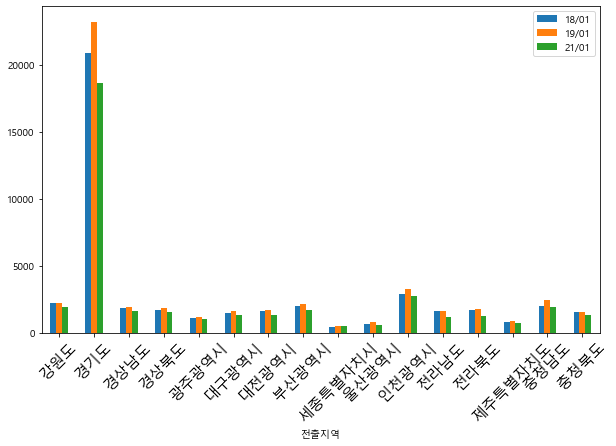

In [19]:
# 18, 19, 2021년 1월 서울 유입 인구 데이터 비교하기
SeoulJan.plot.bar(figsize = (10, 6))
plt.xticks(rotation = 45, fontsize = 15)
plt.show()

- 1월의 경우 전체적으로 서울로의 인구 유입이 18년도에서 19년도까지는 증가했다가 코로나 발발 이후부터는 인구 유입이 감소함을 알 수 있다.  
- 이제 연평균으로 나타내서 살펴보자.

In [20]:
# 2018년 서울 전입 인구 연평균
aMean = pd.DataFrame(aSeoul.mean(axis = 1))
# 2019년 서울 전입 인구 연평균
bMean = pd.DataFrame(bSeoul.mean(axis = 1))
# 20,21년 서울 전입 인구 연평균
cMean = pd.DataFrame(cSeoul.mean(axis = 1))

In [21]:
# 세 데이터프레임 합치기
SeoulYearMean = pd.concat([aMean, bMean, cMean], axis = 1)
SeoulYearMean.columns = ['2018년', '2019년', '20/21년']
SeoulYearMean.head()

,2018년,2019년,20/21년
전출지역,,,
강원도,1701.416667,1657.916667,1591.916667
경기도,19443.333333,20194.916667,20876.083333
경상남도,1489.333333,1527.166667,1431.166667
경상북도,1371.583333,1407.250000,1336.833333
광주광역시,904.916667,893.916667,863.000000


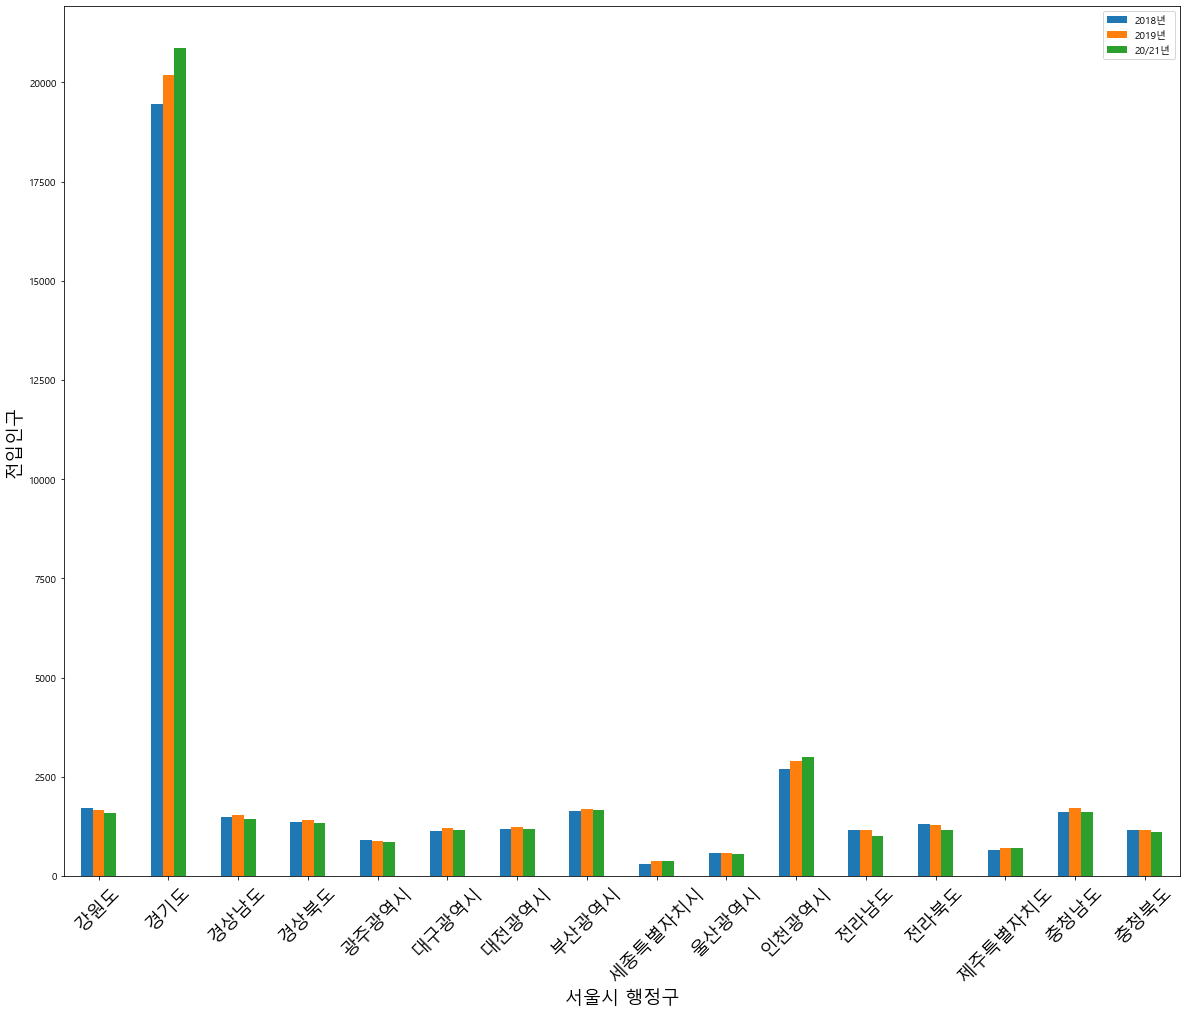

In [22]:
# 경기도 포함한 바 그래프
SeoulYearMean.plot.bar(figsize = (20, 16))
plt.xticks(rotation = 45, fontsize = 18)
plt.xlabel('서울시 행정구', fontsize = 18)
plt.ylabel('전입인구', fontsize = 18)
plt.show()

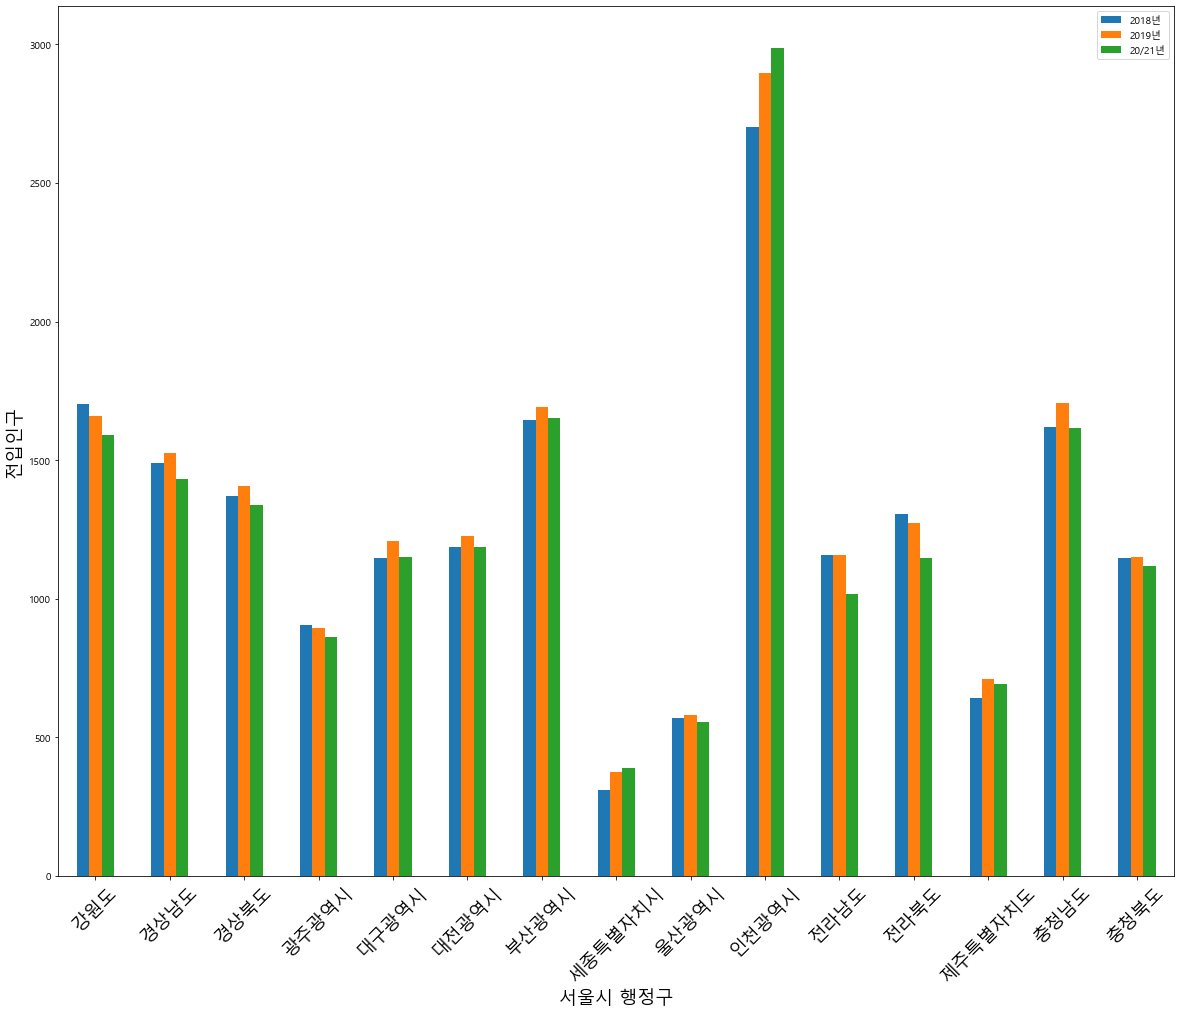

In [23]:
# 경기도가 너무 압도적으로 높아 다른 지역들의 수치를 자세히 살펴보지 못하니
# 경기도 포함하지 않은 바 그래프를 그린다
SeoulYearMean[SeoulYearMean.index != '경기도'].plot.bar(figsize = (20, 16))
plt.xticks(rotation = 45, fontsize = 18)
plt.xlabel('서울시 행정구', fontsize = 18)
plt.ylabel('전입인구', fontsize = 18)
plt.show()

- 위 두 개의 바그래프를 살펴보면 수도권(경기, 인천)과 강원도, 호남(광주, 전북, 전남)을 제외한 나머지 지역은 전체적으로 18년도부터 19년도까지는 서울로 인구 유입이 증가하는 추세였다가 코로나 발발 이후인 2020년, 2021년에는 인구 유입이 감소했음을 볼 수 있다.  
- 그리고 수도권 인구 집중 현상은 오래 전부터 우리 사회의 고질적인 문제점이다.

# 전출입 데이터 분석 결론  
- 전체적으로 코로나 발발하기 전과 비교해 코로나 발발 이후는 서울 인구 유입 현상이 줄어듦과 동시에 수도권 인구 집중 현상이 동시에 일어났다.  

# Step3. 서울시 생활인구 데이터 분석  
- 여기서 서울의 생활인구란 서울에 거주하거나 출퇴근, 관광, 의료, 등하교 등의 다양한 목적으로 서울을 찾는 인구를 모두 포함한다.  

In [24]:
# 데이터 불러오기
OldSeoulPop = pd.read_csv('data/유동인구/서울유동인구/19년서울생활인구.csv', encoding = 'utf-8')
NewSeoulPop = pd.read_csv('data/유동인구/서울유동인구/20년서울생활인구.csv', encoding = 'cp949')

# 데이터 출처 : 서울 열린데이터 광장 / 자치구단위 서울생활인구 일별 집계표

In [25]:
OldSeoulPop.head()

,기준일ID,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
0,20191231,11000,서울시,1.144163e+07,1.080915e+07,419381.2335,213100.9530,1.175579e+07,1.115667e+07,1.168587e+07,1.126718e+07,6.274862e+06,1.538573e+06,2.204422e+06,2.531867e+06
1,20191231,11110,종로구,3.342785e+05,3.001823e+05,17124.9970,16971.2253,4.375819e+05,2.482492e+05,4.057671e+05,2.832153e+05,2.776823e+05,7.288186e+04,3.216615e+04,1.726342e+05
2,20191231,11140,중구,3.726444e+05,2.917909e+05,24543.0154,56310.4528,5.250813e+05,2.510905e+05,4.854453e+05,2.920723e+05,3.470132e+05,9.273279e+04,3.211245e+04,2.221680e+05
3,20191231,11170,용산구,3.321697e+05,3.004182e+05,20241.7637,11509.7017,3.625997e+05,2.891897e+05,3.570361e+05,3.144079e+05,2.020151e+05,5.667029e+04,4.609648e+04,9.924838e+04
4,20191231,11200,성동구,3.717038e+05,3.515493e+05,17769.9791,2384.5326,3.908473e+05,3.478098e+05,3.831056e+05,3.635596e+05,2.102009e+05,4.077384e+04,6.741892e+04,1.020082e+05


In [26]:
NewSeoulPop.head()

,기준일ID,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
0,20210630,11000,서울시,1.097254e+07,1.051621e+07,371680.6658,84650.5468,1.131545e+07,1.064798e+07,1.125733e+07,1.076913e+07,6.402224e+06,1.544948e+06,2.230317e+06,2.626959e+06
1,20210630,11110,종로구,3.119475e+05,2.939494e+05,14460.0690,3538.0301,4.183949e+05,2.232952e+05,3.953539e+05,2.523714e+05,2.891505e+05,7.352739e+04,3.578879e+04,1.798344e+05
2,20210630,11140,중구,3.120794e+05,2.814710e+05,19089.6669,11518.7111,4.555612e+05,1.981640e+05,4.233939e+05,2.325691e+05,3.342460e+05,8.874441e+04,3.259291e+04,2.129086e+05
3,20210630,11170,용산구,3.070358e+05,2.861800e+05,17332.3065,3523.5120,3.344048e+05,2.771571e+05,3.300180e+05,2.906199e+05,1.990849e+05,5.281835e+04,5.060244e+04,9.566413e+04
4,20210630,11200,성동구,3.640963e+05,3.470168e+05,14355.3872,2724.1190,3.855625e+05,3.407443e+05,3.813426e+05,3.517776e+05,2.236888e+05,4.446220e+04,6.382791e+04,1.153987e+05


In [27]:
# 총생활인구수만 살펴보자
OldSeoulPop = OldSeoulPop.loc[:, ['기준일ID', '시군구명', '총생활인구수']]
NewSeoulPop = NewSeoulPop.loc[:, ['기준일ID', '시군구명', '총생활인구수']]

In [28]:
# 컬럼명 바꾸기 
OldSeoulPop.rename(columns = {'기준일ID' : '날짜'}, inplace = True)
NewSeoulPop.rename(columns = {'기준일ID' : '날짜'}, inplace = True)

In [29]:
# 데이터프레임 인덱스 재정렬
OldSeoulPop = pd.pivot_table(OldSeoulPop, index = ['날짜', '시군구명'], aggfunc = np.mean)
NewSeoulPop = pd.pivot_table(NewSeoulPop, index = ['날짜', '시군구명'], aggfunc = np.mean)

In [30]:
# 데이터 재배치
OldSeoulPop = OldSeoulPop.unstack()
OldSeoulPop.head()

총생활인구수                                                      \
시군구명              강남구          강동구          강북구          강서구          관악구   
날짜                                                                          
20190101  690732.2796  512721.2685  327430.0509  591562.3706  551455.2831   
20190102  908005.8135  506561.6408  306666.3456  581919.3209  524931.0355   
20190103  933403.9428  502404.0281  302664.6182  576280.6872  522545.3229   
20190104  935442.1324  503624.4488  302061.4242  574372.8703  523873.0391   
20190105  797379.7238  515469.5862  316779.3835  585833.5756  554047.9813   

                                                                           \
시군구명              광진구          구로구          금천구          노원구          도봉구   
날짜                                                                          
20190101  425459.8374  437373.9305  234535.7673  549961.8611  323486.1158   
20190102  410664.1932  440089.2041  256960.1738  528944.0516  302973.4909   
20190103  410803.2764  437728.2238  255884.6368  525792.7378  299985.0260   
20190104  412808.3082  434923.3192  254571.7229  524561.3155  299449.8496   
20190105  431638.4053  438280.7948  230715.9820  546306.6587  314065.1253   

          ...                                                      \
시군구명      ...          성동구          성북구          송파구          양천구   
날짜        ...                                                       
20190101  ...  351993.7795  466076.0300  773710.5718  418575.9694   
20190102  ...  376151.5297  454765.8500  789880.7315  407259.7099   
20190103  ...  377526.1197  453146.7483  795653.1443  404736.3495   
20190104  ...  376832.8412  451324.5713  795405.1332  403497.5273   
20190105  ...  362284.8388  464476.4946  803709.6084  417936.5808   

                                                                           \
시군구명             영등포구          용산구          은평구          종로구           중구   
날짜                                                                          
20190101  488378.5508  315220.1848  482253.2117  274919.6594  267096.6594   
20190102  551476.0152  325342.0618  453066.9681  345457.0571  373746.8974   
20190103  551868.9006  327276.1520  449282.4239  358414.0007  394238.9122   
20190104  552180.0652  331403.5685  448528.2847  360042.5516  397740.3128   
20190105  500964.2007  323881.1973  473552.8188  312500.3627  315454.8839   

                       
시군구명              중랑구  
날짜                     
20190101  396392.2329  
20190102  374120.9759  
20190103  370849.2157  
20190104  370128.0090  
20190105  388139.5476  

[5 rows x 26 columns]

In [31]:
NewSeoulPop = NewSeoulPop.unstack()
NewSeoulPop.head()

총생활인구수                                                      \
시군구명              강남구          강동구          강북구          강서구          관악구   
날짜                                                                          
20200701  908429.4444  513062.7340  300164.6127  552891.2604  502550.2016   
20200702  903840.1870  509201.7168  299124.1789  550101.0375  499691.1586   
20200703  901713.3730  509026.5699  299024.8661  548344.6373  496285.7156   
20200704  768871.2003  513956.1482  308558.5198  547241.3028  515058.8352   
20200705  712521.8706  521623.2640  315527.4788  553247.7876  526582.6407   

                                                                           \
시군구명              광진구          구로구          금천구          노원구          도봉구   
날짜                                                                          
20200701  389947.5310  423015.5247  252509.8291  523738.0693  281255.9794   
20200702  388763.9417  420404.4496  250717.8417  519956.6141  279229.2798   
20200703  389259.2030  418068.7474  247785.5196  519283.3497  279186.7347   
20200704  399037.2267  405711.2041  220263.3860  531675.7934  289668.6173   
20200705  400063.7957  414307.5186  221763.1684  539594.5705  298116.5379   

          ...                                                      \
시군구명      ...          성동구          성북구          송파구          양천구   
날짜        ...                                                       
20200701  ...  367973.3162  442127.5612  772490.5965  401712.5466   
20200702  ...  366618.7772  438294.7163  768251.8708  399986.3887   
20200703  ...  366047.4789  436261.6171  768177.0682  399066.1266   
20200704  ...  346210.0824  440395.2412  757904.2963  407491.1069   
20200705  ...  343320.3230  448609.3714  750043.8799  411946.8037   

                                                                           \
시군구명             영등포구          용산구          은평구          종로구           중구   
날짜                                                                          
20200701  517923.1775  314665.5179  447076.4719  326493.0543  315871.8356   
20200702  513986.1097  317002.2714  444088.3397  321451.3401  313384.4071   
20200703  512755.3355  316551.3360  443481.7909  317212.5066  311193.2117   
20200704  463506.5049  299628.1706  463460.8193  269992.7385  229836.7453   
20200705  458544.6151  293901.6582  472682.7490  249746.5097  202261.3007   

                       
시군구명              중랑구  
날짜                     
20200701  355850.6293  
20200702  353654.9521  
20200703  352953.1355  
20200704  364869.6041  
20200705  372255.0305  

[5 rows x 26 columns]

In [32]:
# 중첩 컬럼 제거
OldSeoulPop.columns = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
                       '동대문구', '동작구', '마포구', '서대문구', '서울시', '서초구', '성동구', '성북구', '송파구', '양천구',
                       '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
NewSeoulPop.columns = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
                       '동대문구', '동작구', '마포구', '서대문구', '서울시', '서초구', '성동구', '성북구', '송파구', '양천구',
                       '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [33]:
# 2019년
# 1월 데이터 
OldJan = OldSeoulPop.loc[:20190131]
# 1월 데이터 컬럼별로 합치기
OldJanSum = OldJan.sum(axis = 0)
OldJanSum = pd.DataFrame(OldJanSum)
OldJanSum.columns = ['19/01(합)']

# 2월 데이터
OldFeb = OldSeoulPop.loc[20190201:20190228]
# 2월 데이터 컬럼별로 합치기
OldFebSum = OldFeb.sum(axis = 0)
OldFebSum = pd.DataFrame(OldFebSum)
OldFebSum.columns = ['19/02(합)']

# 3월 데이터
OldMar = OldSeoulPop.loc[20190301:20190331]
# 3월 데이터 컬럼별로 합치기
OldMarSum = OldMar.sum(axis = 0)
OldMarSum = pd.DataFrame(OldFebSum)
OldMarSum.columns = ['19/03(합)']

# 4월 데이터
OldApr = OldSeoulPop.loc[20190401:20190430]
# 4월 데이터 컬럼별로 합치기
OldAprSum = OldApr.sum(axis = 0)
OldAprSum = pd.DataFrame(OldAprSum)
OldAprSum.columns = ['19/04(합)']

# 5월 데이터
OldMay = OldSeoulPop.loc[20190501:20190531]
# 5월 데이터 컬럼별로 합치기
OldMaySum = OldMay.sum(axis = 0)
OldMaySum = pd.DataFrame(OldMaySum)
OldMaySum.columns = ['19/05(합)']

# 6월 데이터
OldJune = OldSeoulPop.loc[20190601:20190630]
# 6월 데이터 컬럼별로 합치기
OldJuneSum = OldJune.sum(axis = 0)
OldJuneSum = pd.DataFrame(OldJuneSum)
OldJuneSum.columns = ['19/06(합)']

# 7월 데이터
OldJuly = OldSeoulPop.loc[20190701:20190731]
# 7월 데이터 컬럼별로 합치기
OldJulySum = OldJuly.sum(axis = 0)
OldJulySum = pd.DataFrame(OldJulySum)
OldJulySum.columns = ['19/07(합)']

# 8월 데이터
OldAug = OldSeoulPop.loc[20190801:20190831]
# 8월 데이터 컬럼별로 합치기
OldAugSum = OldAug.sum(axis = 0)
OldAugSum = pd.DataFrame(OldAugSum)
OldAugSum.columns = ['19/08(합)']

# 9월 데이터
OldSep = OldSeoulPop.loc[20190901:20190930]
# 9월 데이터 컬럼별로 합치기
OldSepSum = OldSep.sum(axis = 0)
OldSepSum = pd.DataFrame(OldSepSum)
OldSepSum.columns = ['19/09(합)']

# 10월 데이터
OldOcto = OldSeoulPop.loc[20191001:20191031]
# 10월 데이터 컬럼별로 합치기
OldOctoSum = OldOcto.sum(axis = 0)
OldOctoSum = pd.DataFrame(OldOctoSum)
OldOctoSum.columns = ['19/10(합)']

# 11월 데이터
OldNov = OldSeoulPop.loc[20191101:20191130]
# 11월 데이터 컬럼별로 합치기
OldNovSum = OldNov.sum(axis = 0)
OldNovSum = pd.DataFrame(OldNovSum)
OldNovSum.columns = ['19/11(합)']

# 12월 데이터
OldDec = OldSeoulPop.loc[20191201:20191231]
# 12월 데이터 컬럼별로 합치기
OldDecSum = OldDec.sum(axis = 0)
OldDecSum = pd.DataFrame(OldDecSum)
OldDecSum.columns = ['19/12(합)']

In [34]:
NewSeoulPop

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
날짜,,,,,,,,,,,,,,,,,,,,,
20200701,908429.4444,513062.7340,300164.6127,552891.2604,502550.2016,389947.5310,423015.5247,252509.8291,523738.0693,281255.9794,...,367973.3162,442127.5612,772490.5965,401712.5466,517923.1775,314665.5179,447076.4719,326493.0543,315871.8356,355850.6293
20200702,903840.1870,509201.7168,299124.1789,550101.0375,499691.1586,388763.9417,420404.4496,250717.8417,519956.6141,279229.2798,...,366618.7772,438294.7163,768251.8708,399986.3887,513986.1097,317002.2714,444088.3397,321451.3401,313384.4071,353654.9521
20200703,901713.3730,509026.5699,299024.8661,548344.6373,496285.7156,389259.2030,418068.7474,247785.5196,519283.3497,279186.7347,...,366047.4789,436261.6171,768177.0682,399066.1266,512755.3355,316551.3360,443481.7909,317212.5066,311193.2117,352953.1355
20200704,768871.2003,513956.1482,308558.5198,547241.3028,515058.8352,399037.2267,405711.2041,220263.3860,531675.7934,289668.6173,...,346210.0824,440395.2412,757904.2963,407491.1069,463506.5049,299628.1706,463460.8193,269992.7385,229836.7453,364869.6041
20200705,712521.8706,521623.2640,315527.4788,553247.7876,526582.6407,400063.7957,414307.5186,221763.1684,539594.5705,298116.5379,...,343320.3230,448609.3714,750043.8799,411946.8037,458544.6151,293901.6582,472682.7490,249746.5097,202261.3007,372255.0305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210626,745011.9412,513608.3140,303703.6503,545086.6206,499062.3616,379439.0116,408418.9770,213655.3742,518730.3095,277716.3325,...,341396.8627,429125.8997,752340.5509,397141.7902,474619.4654,299971.1440,450965.2195,262715.2676,231626.2931,361900.0558
20210627,693829.6539,519105.0318,308929.9238,547730.2818,509409.8333,380628.7869,416230.0018,214943.1585,523714.0026,284405.8585,...,335802.4675,435717.6904,743343.4535,400244.9018,468756.9145,294986.7957,458412.9134,247212.4865,211725.8799,367179.4691
20210628,870341.6367,511991.2698,296284.6847,552283.6906,488602.7017,373403.1923,424838.9742,246540.0604,507889.2080,271425.9451,...,362486.6908,428308.7388,760198.5572,389004.8324,522142.4911,304355.3503,436783.4972,305228.0270,303933.7397,352179.4586


In [35]:
# 20/21년
# 20.7월 데이터 
NewJuly = NewSeoulPop.loc[:20200731]
# 7월 데이터 컬럼별로 합치기
NewJulySum = NewJuly.sum(axis = 0)
NewJulySum = pd.DataFrame(NewJulySum)
NewJulySum.columns = ['20/07(합)']

# 20.8월 데이터
NewAug = NewSeoulPop.loc[20200801:20200831]
# 8월 데이터 컬럼별로 합치기
NewAugSum = NewAug.sum(axis = 0)
NewAugSum = pd.DataFrame(NewAugSum)
NewAugSum.columns = ['20/08(합)']

# 20.9월 데이터
NewSep = NewSeoulPop.loc[20200901:20200930]
# 9월 데이터 컬럼별로 합치기
NewSepSum = NewSep.sum(axis = 0)
NewSepSum = pd.DataFrame(NewSepSum)
NewSepSum.columns = ['20/09(합)']

# 20.10월 데이터
NewOcto = NewSeoulPop.loc[20201001:20201031]
# 10월 데이터 컬럼별로 합치기
NewOctoSum = NewOcto.sum(axis = 0)
NewOctoSum = pd.DataFrame(NewOctoSum)
NewOctoSum.columns = ['20/10(합)']

# 20.11월 데이터
NewNov = NewSeoulPop.loc[20201101:20201130]
# 11월 데이터 컬럼별로 합치기
NewNovSum = NewNov.sum(axis = 0)
NewNovSum = pd.DataFrame(NewNovSum)
NewNovSum.columns = ['20/11(합)']

# 20.12월 데이터
NewDec = NewSeoulPop.loc[20201201:20201231]
# 12월 데이터 컬럼별로 합치기
NewDecSum = OldDec.sum(axis = 0)
NewDecSum = pd.DataFrame(NewDecSum)
NewDecSum.columns = ['20/12(합)']

# 21.1월 데이터
NewJan = NewSeoulPop.loc[20210101:20210131]
# 1월 데이터 컬럼별로 합치기
NewJanSum = NewJan.sum(axis = 0)
NewJanSum = pd.DataFrame(NewJanSum)
NewJanSum.columns = ['21/01(합)']

# 21.2월 데이터
NewFeb = NewSeoulPop.loc[20210201:20210228]
# 2월 데이터 컬럼별로 합치기
NewFebSum = NewFeb.sum(axis = 0)
NewFebSum = pd.DataFrame(NewFebSum)
NewFebSum.columns = ['21/02(합)']

# 21.3월 데이터
NewMar = NewSeoulPop.loc[20210301:20210330]
# 3월 데이터 컬럼별로 합치기
NewMarSum = NewMar.sum(axis = 0)
NewMarSum = pd.DataFrame(NewMarSum)
NewMarSum.columns = ['21/03(합)']

# 21.4월 데이터
NewApr = NewSeoulPop.loc[20210401:20210430]
# 4월 데이터 컬럼별로 합치기
NewAprSum = NewApr.sum(axis = 0)
NewAprSum = pd.DataFrame(NewAprSum)
NewAprSum.columns = ['21/04(합)']

# 21.5월 데이터
NewMay = NewSeoulPop.loc[20210501:20210531]
# 5월 데이터 컬럼별로 합치기
NewMaySum = NewMay.sum(axis = 0)
NewMaySum = pd.DataFrame(NewMaySum)
NewMaySum.columns = ['21/05(합)']

# 21.6월 데이터
NewJune = NewSeoulPop.loc[20210601:20210630]
# 12월 데이터 컬럼별로 합치기
NewJuneSum = NewJune.sum(axis = 0)
NewJuneSum = pd.DataFrame(NewJuneSum)
NewJuneSum.columns = ['21/06(합)']

In [36]:
# 위 데이터들 합치기
OldMonth = [OldJanSum, OldFebSum, OldMarSum, OldAprSum, OldMaySum, OldJuneSum, OldJulySum, OldAugSum, 
            OldSepSum, OldOctoSum, OldNovSum, OldDecSum]
OldYear = pd.concat(OldMonth, axis = 1)

NewMonth = [NewJulySum, NewAugSum, NewSepSum, NewOctoSum, NewNovSum, NewDecSum, NewJanSum, NewFebSum, 
            NewMarSum, NewAprSum, NewMaySum, NewJuneSum,]
NewYear = pd.concat(NewMonth, axis = 1)

In [37]:
OldYear.head()

,19/01(합),19/03(합),19/03(합),19/04(합),19/05(합),19/06(합),19/07(합),19/08(합),19/09(합),19/10(합),19/11(합),19/12(합)
강남구,2.734271e+07,2.291950e+07,2.291950e+07,2.546773e+07,2.541167e+07,2.477286e+07,2.634931e+07,2.677816e+07,2.504856e+07,1.553905e+07,2.642857e+07,2.734845e+07
강동구,1.563291e+07,1.375701e+07,1.375701e+07,1.455870e+07,1.450589e+07,1.416801e+07,1.451525e+07,1.509213e+07,1.461309e+07,8.884186e+06,1.490393e+07,1.564443e+07
강북구,9.598244e+06,8.670425e+06,8.670425e+06,9.085443e+06,9.130831e+06,8.823639e+06,8.948884e+06,9.364534e+06,9.248256e+06,5.543851e+06,9.264572e+06,9.737694e+06
강서구,1.801840e+07,1.587495e+07,1.587495e+07,1.669145e+07,1.669100e+07,1.629202e+07,1.675981e+07,1.687838e+07,1.639534e+07,9.944549e+06,1.691538e+07,1.756956e+07
관악구,1.658734e+07,1.448811e+07,1.448811e+07,1.552504e+07,1.550333e+07,1.509188e+07,1.534454e+07,1.552112e+07,1.502691e+07,9.131881e+06,1.548508e+07,1.611847e+07


In [38]:
NewYear.head()

,20/07(합),20/08(합),20/09(합),20/10(합),20/11(합),20/12(합),21/01(합),21/02(합),21/03(합),21/04(합),21/05(합),21/06(합)
강남구,2.681529e+07,2.562313e+07,2.419666e+07,2.515618e+07,2.496777e+07,2.734845e+07,2.459936e+07,2.244093e+07,2.506381e+07,2.486250e+07,2.508867e+07,2.507150e+07
강동구,1.593240e+07,1.584149e+07,1.545184e+07,1.570296e+07,1.520704e+07,1.564443e+07,1.607393e+07,1.437799e+07,1.550757e+07,1.529025e+07,1.583907e+07,1.537106e+07
강북구,9.445478e+06,9.471155e+06,9.234229e+06,9.453764e+06,9.088016e+06,9.737694e+06,9.551973e+06,8.552778e+06,9.086629e+06,8.952345e+06,9.262264e+06,8.949578e+06
강서구,1.714605e+07,1.704705e+07,1.662190e+07,1.703042e+07,1.656991e+07,1.756956e+07,1.726444e+07,1.545289e+07,1.667492e+07,1.645727e+07,1.700323e+07,1.650343e+07
관악구,1.573636e+07,1.577486e+07,1.533398e+07,1.553477e+07,1.503974e+07,1.611847e+07,1.572519e+07,1.393991e+07,1.510753e+07,1.493970e+07,1.545539e+07,1.483065e+07


In [39]:
# 2019년 연평균 생활인구
OldYearMean = pd.DataFrame(OldYear.mean(axis = 1))
OldYearMean.columns = ['2019년 평균 생활인구수']

# 20/21년 연평균 생활인구
NewYearMean = pd.DataFrame(NewYear.mean(axis = 1))
NewYearMean.columns = ['20/21년 평균 생활인구수']

# 서울시 로우 제외
OldYearMean = OldYearMean[OldYearMean.index != '서울시']
NewYearMean = NewYearMean[NewYearMean.index != '서울시']

In [40]:
OldYearMean.head()

,2019년 평균 생활인구수
강남구,2.469384e+07
강동구,1.416938e+07
강북구,8.840567e+06
강서구,1.615882e+07
관악구,1.485932e+07


In [41]:
# 두 데이터프레임 합치기
YearMean = pd.concat([OldYearMean, NewYearMean], axis = 1)
YearMean.sort_values(by = '2019년 평균 생활인구수', ascending = False, inplace = True)
YearMean.head()

,2019년 평균 생활인구수,20/21년 평균 생활인구수
강남구,2.469384e+07,2.510285e+07
송파구,2.271529e+07,2.306602e+07
서초구,1.786254e+07,1.771735e+07
강서구,1.615882e+07,1.677842e+07
노원구,1.524766e+07,1.592419e+07


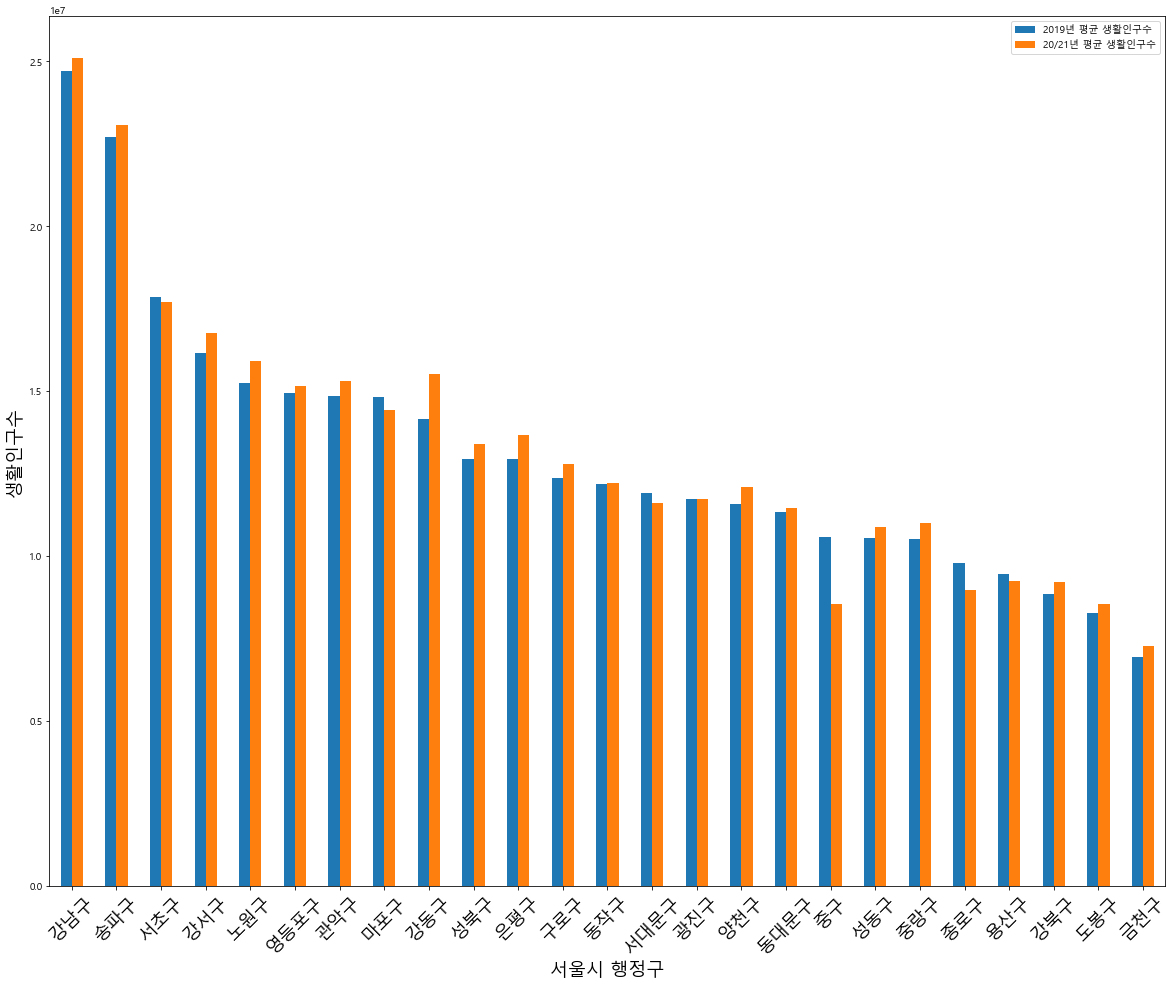

In [42]:
# 생활인구수 그래프
YearMean.plot.bar(figsize = (20, 16))
plt.xticks(rotation = 45, fontsize = 18)
plt.xlabel('서울시 행정구', fontsize = 18)
plt.ylabel('생활인구수', fontsize = 18)
plt.show()

- 생활인구의 정의에 따라 거주 인구도 포함하기 때문에 거주 인구가 많은 강남구, 송파구, 강서구, 노원구는 기본적인 생활인구수가 다른 구에 비해 많을 수 밖에 없다.
- 주로 유흥업소나 주점이 많은 서초구, 마포구는 코로나 발발 이후 생활인구가 감소했음을 볼 수 있다.  
- 그리고 주요 관광지가 많은 서대문구, 중구, 종로구, 용산구도 생활인구가 감소했다.  

In [43]:
# 2019년과 20/21년 생활인구수 증감수 컬럼 새로 추가
YearMean['증감인구수'] = YearMean['2019년 평균 생활인구수'] - YearMean['20/21년 평균 생활인구수']
YearMean.head()

,2019년 평균 생활인구수,20/21년 평균 생활인구수,증감인구수
강남구,2.469384e+07,2.510285e+07,-409013.502100
송파구,2.271529e+07,2.306602e+07,-350738.695967
서초구,1.786254e+07,1.771735e+07,145193.170550
강서구,1.615882e+07,1.677842e+07,-619606.116450
노원구,1.524766e+07,1.592419e+07,-676535.054742


In [44]:
# 증감 인구수 지도에 나타내기
geo_path = 'data/전출입/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start = 10.5, titles = 'State Toner')

map.choropleth(geo_data = geo_str,
               data = YearMean,
               columns = [YearMean.index, '증감인구수'],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\Users\hop73\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# 생활인구 데이터 분석 결론  
- 지도에 나타난 증감인구수를 보면 중구, 종로구, 마포구 순으로 생활인구수가 감소했음을 알 수 있다.  

# Step4. 거주인구와 세대수 데이터 살펴보기  
- 강남구, 송파구, 강서구, 노원구, 영등포구, 강동구 등이 생활인구가 증가한 원인이 무엇인지 알아보기 위해 거주 인구 및 세대 수 데이터를 살펴보자

In [45]:
# 파일 불러오기 (분기별 거주인구 조사 파일)
old = pd.read_csv('data/전출입/19년서울인구.csv', encoding = 'cp949')
new = pd.read_csv('data/전출입/20,21년서울인구.csv', encoding = 'cp949')

# 데이터 출처 : 서울 열린데이터 광장 / 서울시 주민등록인구 (구별) 통계

In [46]:
old.head()

,기간,자치구,세대,인구,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,합계,NaN,NaN
1,NaN,NaN,NaN,계,남자,여자
2,2019.1/4,합계,4290922.0,10054979,4909387,5145592
3,NaN,종로구,73914.0,162913,78963,83950
4,NaN,중구,61800.0,135836,66720,69116


In [47]:
new.head()

,기간,자치구,세대,인구,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,합계,NaN,NaN
1,NaN,NaN,NaN,계,남자,여자
2,2020.3/4,합계,4405833.0,9953009,4840912,5112097
3,NaN,종로구,74861.0,159842,77391,82451
4,NaN,중구,63594.0,135321,66193,69128


In [48]:
# 0, 1번째 로우 삭제
old.drop([0, 1], inplace = True)
new.drop([0, 1], inplace = True)

# 남자, 여자 컬럼 삭제
del old['Unnamed: 4']
del new['Unnamed: 4']
del old['Unnamed: 5']
del new['Unnamed: 5']

In [49]:
# 기간 결측치 채우기
# 바로 위의 값으로 채우면 될듯 
old.fillna(method = 'ffill', inplace = True)
new.fillna(method = 'ffill', inplace = True)

In [50]:
# 데이터들 모두 float형으로 바꾸기
old['세대'] = old['세대'].astype(float)
old['인구'] = old['인구'].astype(float)
new['세대'] = new['세대'].astype(float)
new['인구'] = new['인구'].astype(float)

In [51]:
# 분기별로 나누기
old_first = old[old.기간 == '2019.1/4']
old_second = old[old.기간 == '2019.2/4']
old_third = old[old.기간 == '2019.3/4']
old_fourth = old[old.기간 == '2019.4/4']

new_first = new[new.기간 == '2021.1/4']
new_second = new[new.기간 == '2021.2/4']
new_third = new[new.기간 == '2020.3/4']
new_fourth = new[new.기간 == '2020.4/4']

In [52]:
# 인덱스 지역으로 설정
# 자치구와 기간 컬럼 제거
old_cols = [old_first, old_second, old_third, old_fourth]

for col in old_cols:
    col.index = [col.자치구.values]
    del col['자치구']
    del col['기간']
    
new_cols = [new_first, new_second, new_third, new_fourth]

for col in new_cols:
    col.index = [col.자치구.values]
    del col['자치구']
    del col['기간']

In [53]:
# 컬럼명 변경
old_first.columns = ['19년1분기 세대', '19년1분기 인구']
old_second.columns = ['19년2분기 세대', '19년2분기 인구']
old_third.columns = ['19년3분기 세대', '19년3분기 인구']
old_fourth.columns = ['19년4분기 세대', '19년4분기 인구']

new_first.columns = ['21년1분기 세대', '21년1분기 인구']
new_second.columns = ['21년2분기 세대', '21년2분기 인구']
new_third.columns = ['20년3분기 세대', '20년3분기 인구']
new_fourth.columns = ['20년4분기 세대', '20년4분기 인구']

In [54]:
# 데이터프레임들 합치기
old = pd.concat(old_cols, axis = 1)
new = pd.concat(new_cols, axis = 1)

# 같은 분기끼리
first = pd.concat([old_first, new_first], axis = 1)
second = pd.concat([old_second, new_second], axis = 1)
third = pd.concat([old_third, new_third], axis = 1)
fourth = pd.concat([old_fourth, new_fourth], axis = 1)

In [55]:
first.index = ['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', 
               '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', 
               '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']
second.index = ['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', 
                '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', 
                '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']
third.index = ['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', 
               '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', 
               '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']
fourth.index = ['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', 
                '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', 
                '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']

In [56]:
# 인구와 세대 데이터프레임 나누기
first_gen = first.loc[:, ['19년1분기 세대', '21년1분기 세대']]
second_gen = second.loc[:, ['19년2분기 세대', '21년2분기 세대']]
third_gen = third.loc[:, ['19년3분기 세대', '20년3분기 세대']]
fourth_gen = fourth.loc[:, ['19년4분기 세대', '20년4분기 세대']]

first_pop = first.loc[:, ['19년1분기 인구', '21년1분기 인구']]
second_pop = second.loc[:, ['19년2분기 인구', '21년2분기 인구']]
third_pop = third.loc[:, ['19년3분기 인구', '20년3분기 인구']]
fourth_pop = fourth.loc[:, ['19년4분기 인구', '20년4분기 인구']]

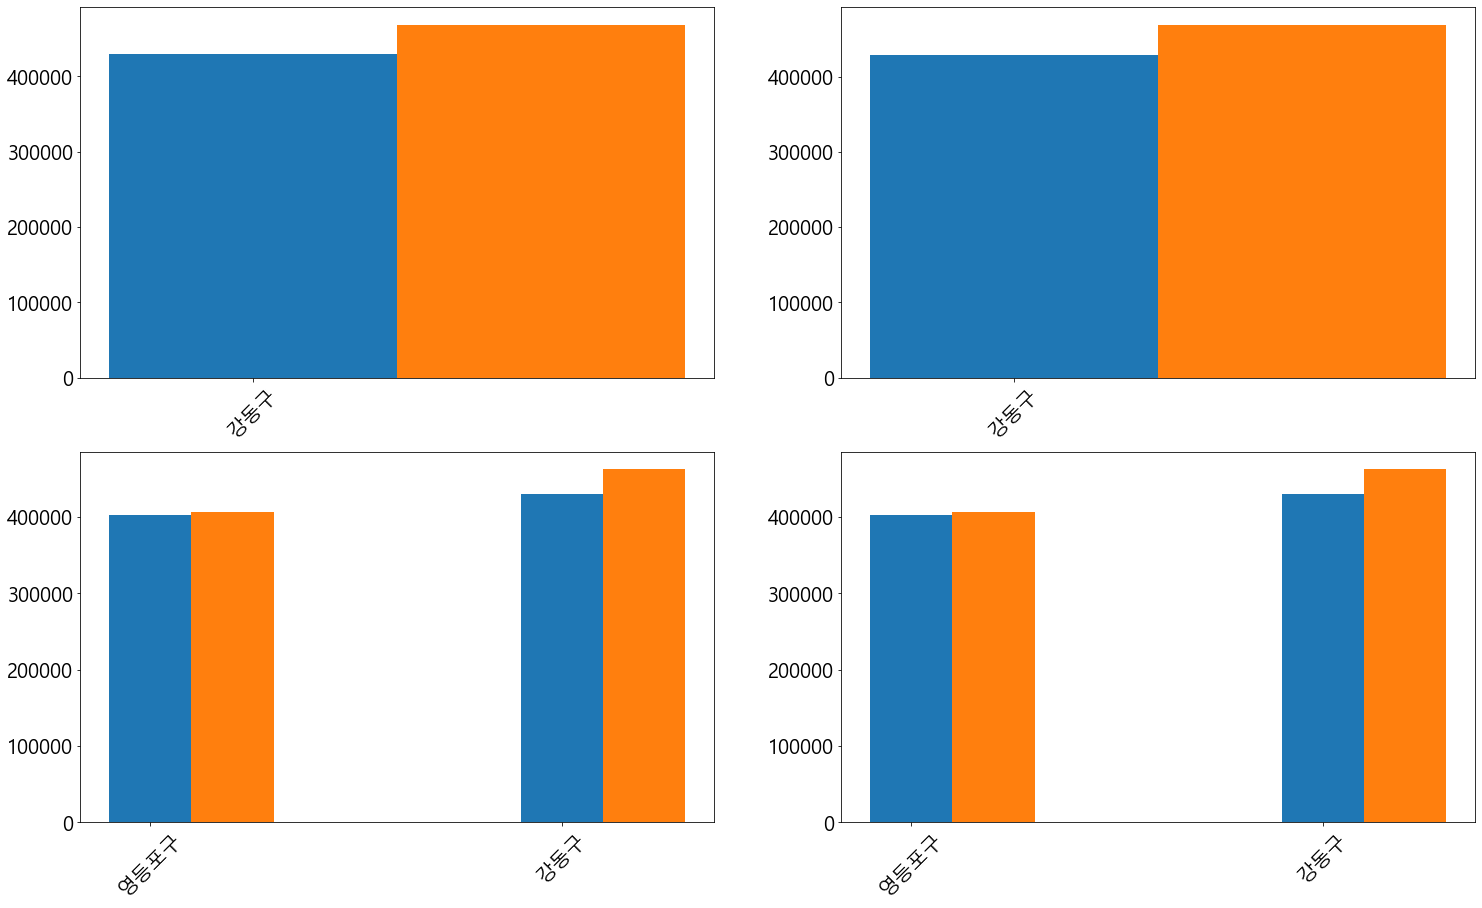

In [57]:
# 각 분기마다 어떤 구가 세대수가 증가했는지 바그래프로 보자
plt.figure(figsize = (25, 15))

# 1분기 인구 증가
plt.subplot(2, 2, 1)
a_1 = first_pop[first_pop.index != '합계']
b_1 = a_1[a_1['19년1분기 인구'] < a_1['21년1분기 인구']]
c_1 = b_1['19년1분기 인구']
d_1 = b_1['21년1분기 인구']

plt.bar(x = np.arange(0, 1), width = 0.2, height = c_1)
plt.bar(x = np.arange(0, 1)+0.2, width = 0.2, height = d_1)
plt.xticks(np.arange(0, 1), b_1.index, rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)

# 2분기 인구 증가
plt.subplot(2, 2, 2)
a_2 = second_pop[second_pop.index != '합계']
b_2 = a_2[a_2['19년2분기 인구'] < a_2['21년2분기 인구']]
c_2 = b_2['19년2분기 인구']
d_2 = b_2['21년2분기 인구']

plt.bar(x = np.arange(0, 1), width = 0.2, height = c_2)
plt.bar(x = np.arange(0, 1)+0.2, width = 0.2, height = d_2)
plt.xticks(np.arange(0, 1), b_2.index, rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)

# 3분기 인구 증가
plt.subplot(2, 2, 3)
a_3 = third_pop[third_pop.index != '합계']
b_3 = a_3[a_3['19년3분기 인구'] < a_3['20년3분기 인구']]
c_3 = b_3['19년3분기 인구']
d_3 = b_3['20년3분기 인구']

plt.bar(x = np.arange(0, 2), width = 0.2, height = c_3)
plt.bar(x = np.arange(0, 2)+0.2, width = 0.2, height = d_3)
plt.xticks(np.arange(0, 2), b_3.index, rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)

# 4분기 인구 증가
plt.subplot(2, 2, 4)
a_4 = fourth_pop[fourth_pop.index != '합계']
b_4 = a_4[a_4['19년4분기 인구'] < a_4['20년4분기 인구']]
c_4 = b_4['19년4분기 인구']
d_4 = b_4['20년4분기 인구']

plt.bar(x = np.arange(0, 2), width = 0.2, height = c_3)
plt.bar(x = np.arange(0, 2)+0.2, width = 0.2, height = d_3)
plt.xticks(np.arange(0, 2), b_3.index, rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

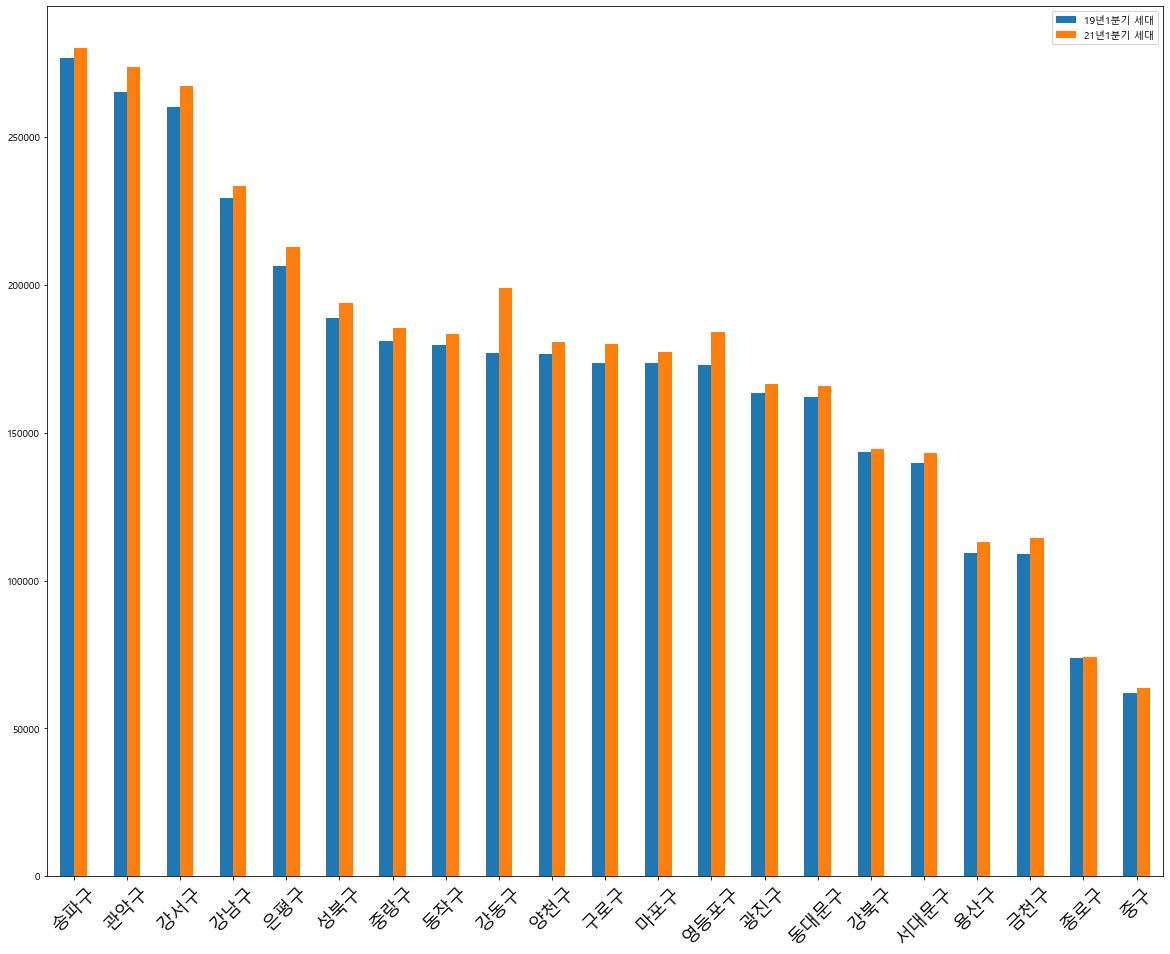

In [58]:
# 1분기 세대수가 증가한 행정구
a = first_gen[first.index != '합계'].sort_values(by = '19년1분기 세대', ascending = False)
b = a[a['19년1분기 세대'] < a['21년1분기 세대']]
b.plot.bar(figsize = (20, 16))
plt.xticks(rotation = 45, fontsize = 18)
plt.show()

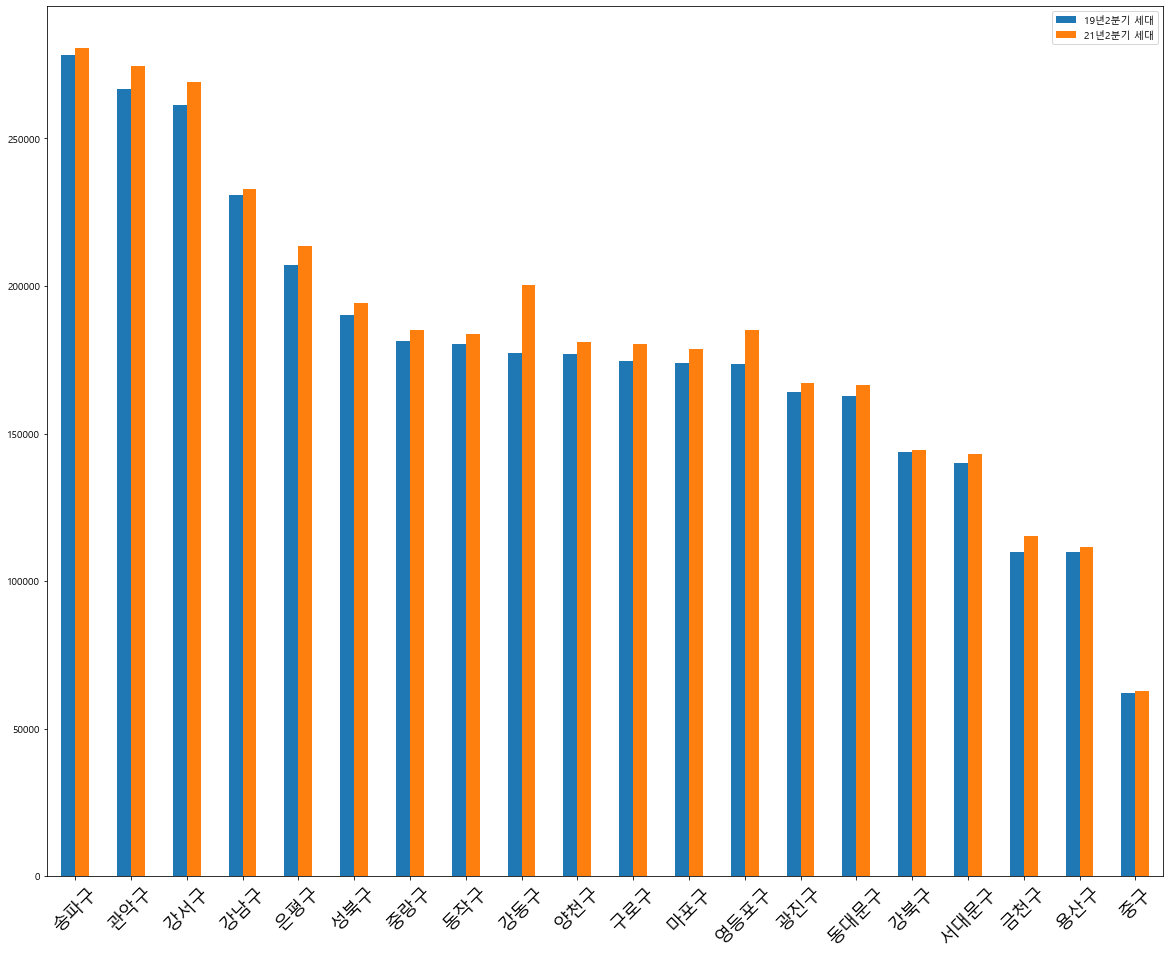

In [59]:
# 2분기 세대수가 증가한 행정구
a = second_gen[second.index != '합계'].sort_values(by = '19년2분기 세대', ascending = False)
b = a[a['19년2분기 세대'] < a['21년2분기 세대']]
b.plot.bar(figsize = (20, 16))
plt.xticks(rotation = 45, fontsize = 18)
plt.show()

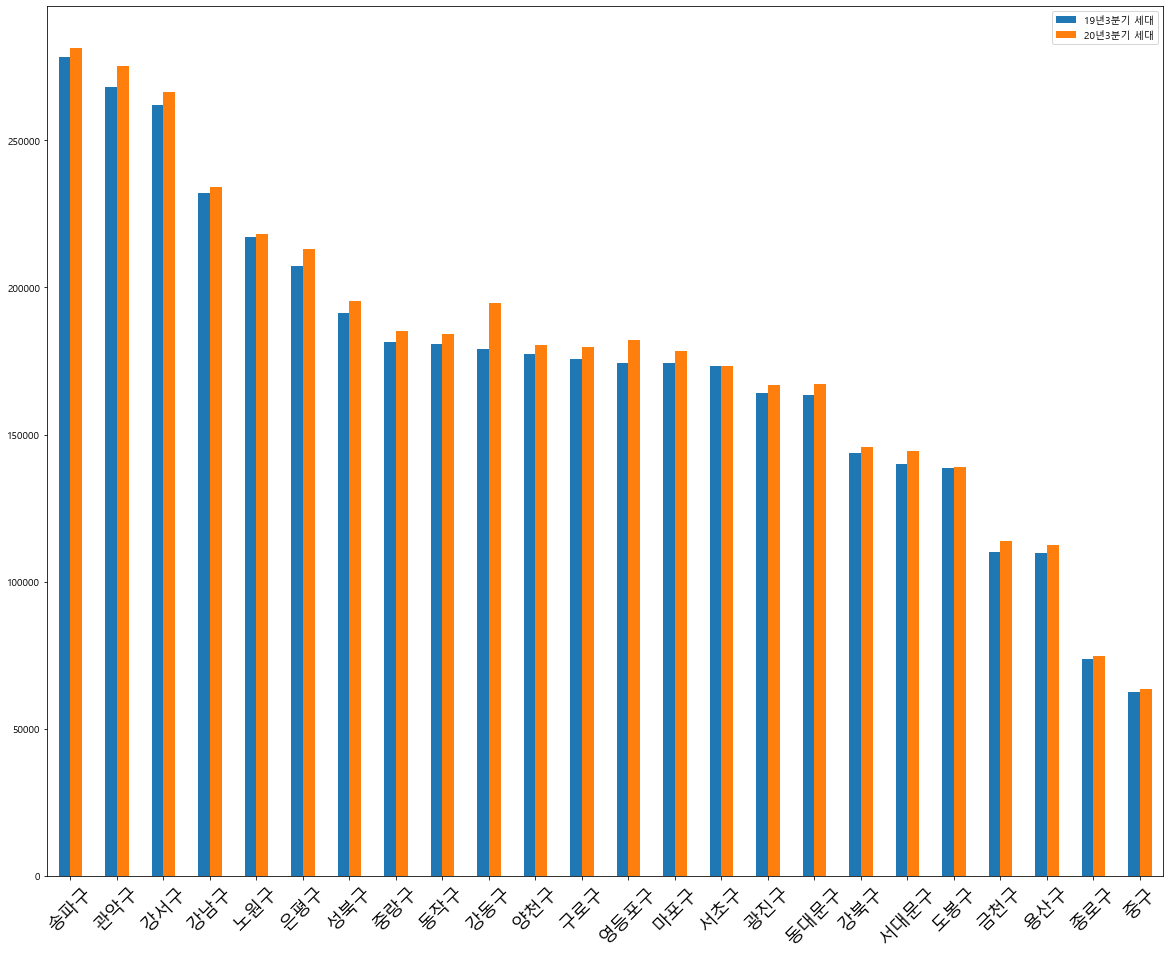

In [60]:
# 3분기 세대수가 증가한 행정구
a = third_gen[third.index != '합계'].sort_values(by = '19년3분기 세대', ascending = False)
b = a[a['19년3분기 세대'] < a['20년3분기 세대']]
b.plot.bar(figsize = (20, 16))
plt.xticks(rotation = 45, fontsize = 18)
plt.show()

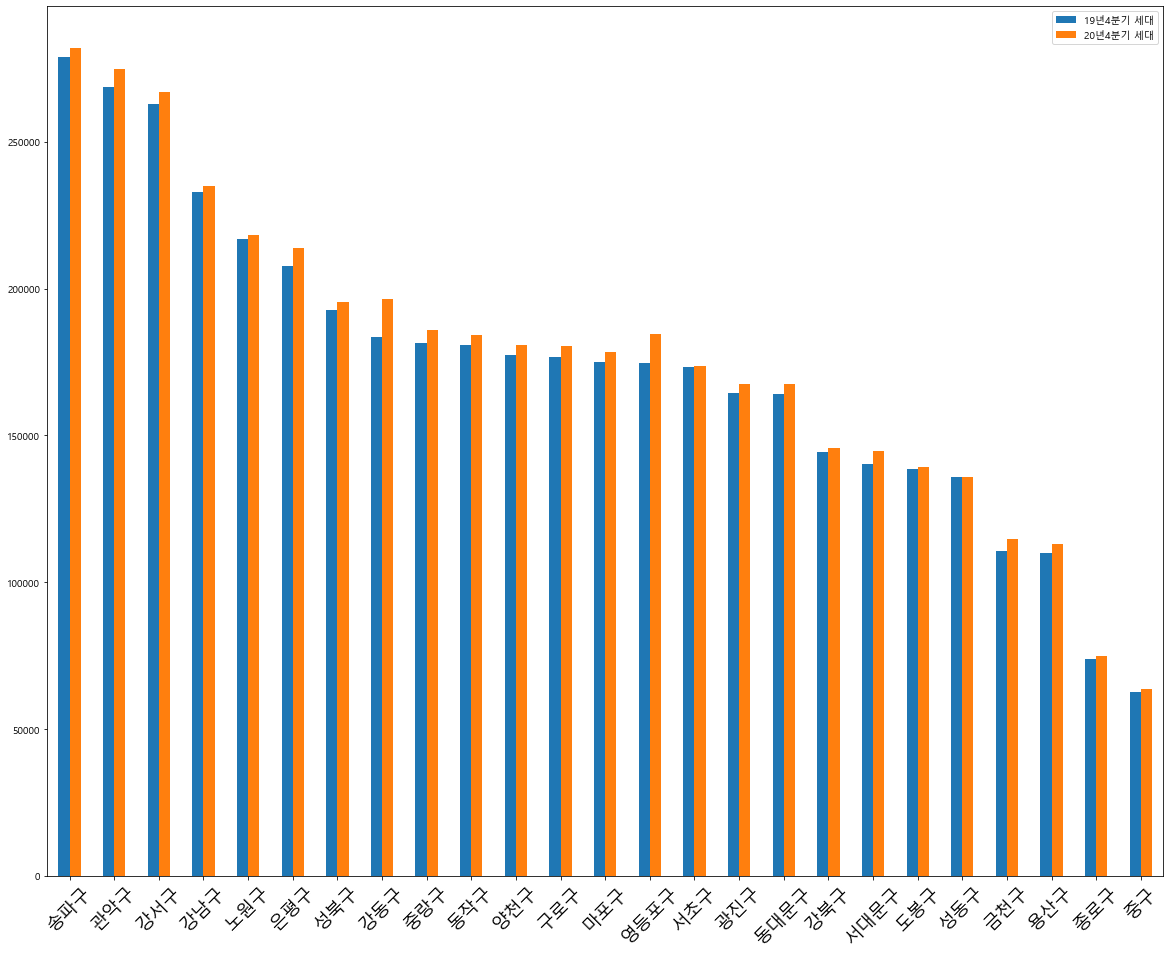

In [61]:
# 4분기 세대수가 증가한 행정구
a = fourth_gen[fourth.index != '합계'].sort_values(by = '19년4분기 세대', ascending = False)
b = a[a['19년4분기 세대'] < a['20년4분기 세대']]
b.plot.bar(figsize = (20, 16))
plt.xticks(rotation = 45, fontsize = 18)
plt.show()

In [62]:
# 전체 세대수, 인구수 보기
print(first.iloc[0, :])
print('----------------------------')
print(second.iloc[0, :])
print('----------------------------')
print(third.iloc[0, :])
print('----------------------------')
print(fourth.iloc[0, :])

19년1분기 세대     4290922.0
19년1분기 인구    10054979.0
21년1분기 세대     4400403.0
21년1분기 인구     9828094.0
Name: 합계, dtype: float64
----------------------------
19년2분기 세대     4304243.0
19년2분기 인구    10041574.0
21년2분기 세대     4405638.0
21년2분기 인구     9795426.0
Name: 합계, dtype: float64
----------------------------
19년3분기 세대     4315921.0
19년3분기 인구    10025927.0
20년3분기 세대     4405833.0
20년3분기 인구     9953009.0
Name: 합계, dtype: float64
----------------------------
19년4분기 세대     4327605.0
19년4분기 인구    10010983.0
20년4분기 세대     4417954.0
20년4분기 인구     9911088.0
Name: 합계, dtype: float64


# 거주 및 세대 인구 데이터 분석 결론  
- 1, 2분기에는 인구가 증가한 행정구가 강동구 밖에 없고 3, 4분기에는 영등포구도 증가했다.  
- 서울시의 인구는 이미 오래 전부터 감소하는 추세였기 때문에 별 의미가 없다.  
- 그러나 세대수를 보면 1, 2, 3, 4분기 모두 증가했으며 대부분의 구가 세대수가 증가했다.  
- 즉, 다인가구는 줄어들면서 1, 2인 가구가 늘어났다고 추정할 수 있다.  
- 이제 이를 알아보기 위해 1인 가구와 생활인구와의 상관관계를 살펴보자.

# Step5. 1인가구 데이터 분석

In [63]:
# 1인가구 데이터 불러오기
old = pd.read_csv('data/전출입/19년1인가구.csv', encoding = 'cp949')
new = pd.read_csv('data/전출입/20년1인가구.csv', encoding = 'cp949')  

# 데이터 출처 : 서울 열린데이터 광장 / 서울시 1인가구(연령별) 통계

In [64]:
old.head()

,기간,구분,성별,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,2019.0,합계,계,1299787,12806,116592,216707,166340,121980,85728,90140,78665,84285,88456,67696,61035,51747,35227,22383
1,NaN,NaN,남자,611561,5010,41263,106618,92561,68322,48156,52545,46217,44855,38575,25180,18463,12486,7167,4143
2,NaN,NaN,여자,688226,7796,75329,110089,73779,53658,37572,37595,32448,39430,49881,42516,42572,39261,28060,18240
3,NaN,종로구,계,24671,507,3280,3903,2647,1872,1405,1704,1521,1718,1572,1201,1120,1047,704,470
4,NaN,NaN,남자,11942,158,1236,2178,1466,959,727,944,880,993,817,562,416,320,170,116


In [65]:
new.head()

,기간,구분,성별,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,2020.0,합계,계,1390701,14185,123990,238517,183573,126485,91518,90186,82704,84976,94834,77047,65469,54109,37968,25140
1,NaN,NaN,남자,650999,5345,42602,114318,102247,70540,51144,52330,48793,46352,42318,28985,20181,13245,7863,4736
2,NaN,NaN,여자,739702,8840,81388,124199,81326,55945,40374,37856,33911,38624,52516,48062,45288,40864,30105,20404
3,NaN,종로구,계,25983,398,3331,4111,2923,1981,1516,1743,1612,1744,1727,1337,1156,1108,749,547
4,NaN,NaN,남자,12663,134,1209,2229,1664,1043,774,983,958,1053,915,625,424,330,186,136


In [66]:
# 결측치 바로 위의 값으로 채우기
old.fillna(method = 'ffill', inplace = True)
new.fillna(method = 'ffill', inplace = True)

In [67]:
# 같은 연령대 합치고 기존 컬럼 삭제하기
old['20대'] = old['20~24세'] + old['25~29세']
del old['20~24세']
del old['25~29세']
old['30대'] = old['30~34세'] + old['35~39세']
del old['30~34세']
del old['35~39세']
old['40대'] = old['40~44세'] + old['45~49세']
del old['40~44세']
del old['45~49세']
old['50대'] = old['50~54세'] + old['55~59세']
del old['50~54세']
del old['55~59세']
old['60대'] = old['60~64세'] + old['65~69세']
del old['60~64세']
del old['65~69세']
old['70대이상'] = old['70~74세'] + old['75~79세'] + old['80~84세'] + old['85세이상']
del old['70~74세']
del old['75~79세']
del old['80~84세']
del old['85세이상']

new['20대'] = new['20~24세'] + new['25~29세']
del new['20~24세']
del new['25~29세']
new['30대'] = new['30~34세'] + new['35~39세']
del new['30~34세']
del new['35~39세']
new['40대'] = new['40~44세'] + new['45~49세']
del new['40~44세']
del new['45~49세']
new['50대'] = new['50~54세'] + new['55~59세']
del new['50~54세']
del new['55~59세']
new['60대'] = new['60~64세'] + new['65~69세']
del new['60~64세']
del new['65~69세']
new['70대이상'] = new['70~74세'] + new['75~79세'] + new['80~84세'] + new['85세이상']
del new['70~74세']
del new['75~79세']
del new['80~84세']
del new['85세이상']

In [68]:
# 1인 가구 수가 많은 20대, 30대, 40대만 뽑기
old = pd.pivot_table(old, index = '구분', aggfunc = np.sum)
old = old.loc[:, ['20대', '30대', '40대']]

new = pd.pivot_table(new, index = '구분', aggfunc = np.sum)
new = new.loc[:, ['20대', '30대', '40대']]

old.columns = ['2019년 20대', '2019년 30대', '2019년 40대']
new.columns = ['2020년 20대', '2020년 30대', '2020년 40대']

In [69]:
# 처음 살펴봤던 서울 생활인구 데이터와 결합
Sum = pd.concat([YearMean, old, new], axis = 1)
Sum.head()

,2019년 평균 생활인구수,20/21년 평균 생활인구수,증감인구수,2019년 20대,2019년 30대,2019년 40대,2020년 20대,2020년 30대,2020년 40대
강남구,2.469384e+07,2.510285e+07,-409013.502100,27962,41720,22118,29622,42934,23108
송파구,2.271529e+07,2.306602e+07,-350738.695967,27320,39242,21958,30142,41742,22954
서초구,1.786254e+07,1.771735e+07,145193.170550,17996,24558,14422,18888,25106,14160
강서구,1.615882e+07,1.677842e+07,-619606.116450,35416,39838,22004,40170,44150,22504
노원구,1.524766e+07,1.592419e+07,-676535.054742,20714,13680,13282,21516,14860,13728


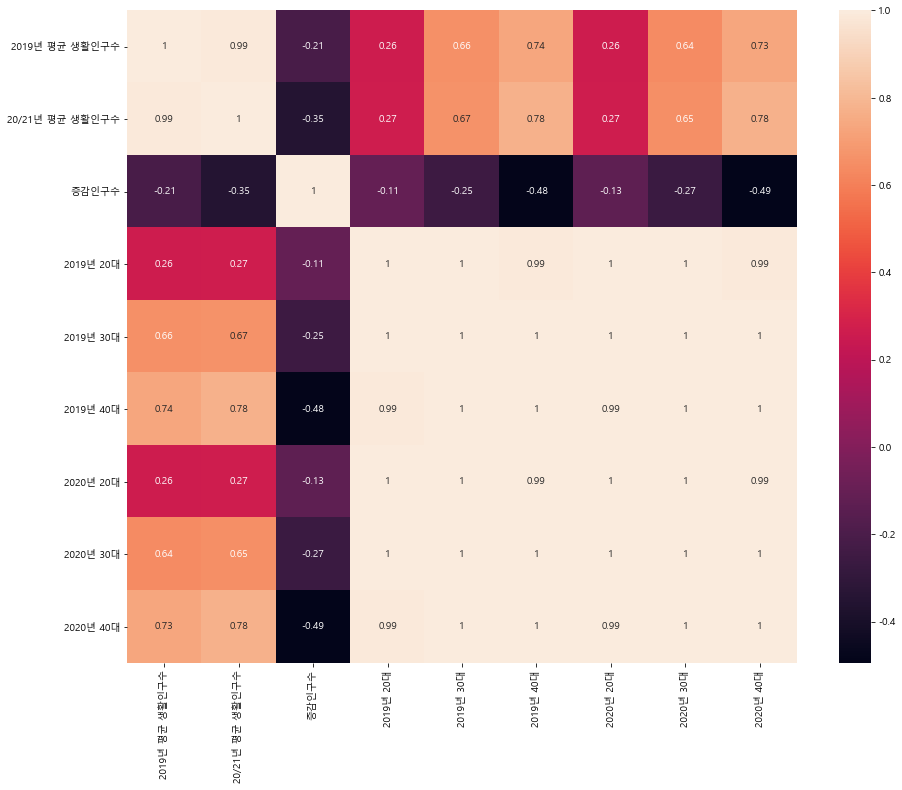

In [70]:
# 상관관계 살펴보기
plt.figure(figsize = (15, 12))
sns.heatmap(Sum.corr(), annot = True)
plt.show()

# 1인가구 데이터 분석 결론  
- 위 그림을 보면 2019년과 2020년 평균 생활인구수는 30대, 40대 1인 가구와의 상관관계가 0.6~0.7이나 된다.    
- 꽤 높은 상관계수를 가짐을 알 수 있다.  
- 따라서 서울시의 생활인구가 증가하는 것에는 30, 40대의 1인 가구가 증가하는 것과 상관있다고 볼 수 있다.  
- 30, 40대라면 대부분 직장인일 것이다.  
- 따라서 30, 40대의 인구가 몰려있는 곳 위주로 쉐어하우스 및 공공주택을 기획하면 될 것 같다.  
- 이를 위해서 서울 열린데이터 광장의 '서울시 우리마을가게 상권분석서비스(상권-직장인구)' 데이터를 가지고 분석을 진행할 것이다.

# Step6. 상권 직장 인구 (생활 인구) 데이터 분석

In [71]:
# 직장인 생활인구 데이터 가져오기
worker = pd.read_csv('data/유동인구/서울유동인구/상권직장인구.csv', encoding = 'cp949')

# 데이터 출처 : 서울 열린데이터 광장 / 서울시 우리마을가게 상권분석서비스(상권-직장인구)

In [72]:
worker.head()

,기준_년월_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,2021,1,U,관광특구,1001496,강남 마이스 관광특구,15904,8904,7000,59,...,3361,2887,1246,225,34,2353,2824,1361,350,78
1,2021,1,U,관광특구,1001495,잠실 관광특구,24375,14199,10176,120,...,4186,3496,2297,1685,69,2238,2379,2121,2217,1152
2,2021,1,U,관광특구,1001494,종로?청계 관광특구,32935,17150,15785,68,...,4911,4591,4158,1190,53,3072,5054,4892,2243,471
3,2021,1,U,관광특구,1001493,동대문패션타운 관광특구,6054,2958,3096,36,...,737,662,600,403,23,891,958,498,461,265
4,2021,1,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,104830,53674,51156,423,...,16080,15133,10824,2640,286,18274,17927,8251,4902,1516


In [73]:
# 해당 데이터는 2014년부터 2021년 1분기까지의 데이터가 존재한다.
# 코로나 발발하기 전의 가장 최근인 2019년 4분기 데이터만 살펴보자
worker = worker[(worker['기준_년월_코드'] == 2019) & (worker['기준_분기_코드'] == 4)]
worker.tail()

,기준_년월_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
8845,2019,4,A,골목상권,1000005,백석동길,1797,1066,731,0,...,351,314,181,69,0,204,230,182,92,23
8846,2019,4,A,골목상권,1000004,명륜길,56,32,24,0,...,5,13,9,3,0,3,8,3,9,1
8847,2019,4,A,골목상권,1000003,돈화문로11가길,3686,2700,986,5,...,731,930,546,220,5,201,355,234,151,40
8848,2019,4,A,골목상권,1000002,난계로27길,201,114,87,1,...,24,33,24,27,1,12,18,28,16,12
8849,2019,4,A,골목상권,1000001,계동길,842,388,454,0,...,55,85,75,143,0,67,105,105,116,61


In [74]:
# 우리에게 필요한 정보는 30, 40대 직장인이므로 이를 제외한 나머지 연령대 컬럼들은 삭제한다
cols = ['총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수', '연령대_10_직장_인구_수', 
        '연령대_20_직장_인구_수', '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', 
        '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수', '남성연령대_50_직장_인구_수',
        '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수',
        '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수']
for col in cols:
    del worker[col]

worker.head()

,기준_년월_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,연령대_30_직장_인구_수,연령대_40_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수
7375,2019,4,U,관광특구,1001496,강남 마이스 관광특구,6185,4248,3361,2887,2824,1361
7376,2019,4,U,관광특구,1001495,잠실 관광특구,6565,5617,4186,3496,2379,2121
7377,2019,4,U,관광특구,1001494,종로?청계 관광특구,9965,9483,4911,4591,5054,4892
7378,2019,4,U,관광특구,1001493,동대문패션타운 관광특구,1695,1160,737,662,958,498
7379,2019,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,34007,23384,16080,15133,17927,8251


In [75]:
# 컬럼명 변경
worker.columns = ['연도', '분기', '상권구분코드', '상권구분명', '상권코드', '상권명', 
                  '30대 총 직장인 수', '40대 총 직장인 수', '남성 30대 직장인 수', '남성 40대 직장인 수', 
                  '여성 30대 직장인 수', '여성 40대 직장인 수']

In [76]:
# 우리가 보고있는 데이터는 2019년 4분기 데이터임을 알고 있으므로 연도, 분기 컬럼은 필요없다
# 그리고 상권구분코드, 상권구분명, 상권코드는 필요없을 것 같다
cols = ['연도', '분기', '상권구분코드', '상권코드']

for col in cols:
    del worker[col]

In [77]:
# 그러나 몇몇 상권명은 google map에 검색을 해도 나오지 않는다
# 이들을 수정한다

# 먼저 상권구분명이 관광특구인 것부터 살펴보자
worker[worker.상권구분명 == '관광특구']

,상권구분명,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수
7375,관광특구,강남 마이스 관광특구,6185,4248,3361,2887,2824,1361
7376,관광특구,잠실 관광특구,6565,5617,4186,3496,2379,2121
7377,관광특구,종로?청계 관광특구,9965,9483,4911,4591,5054,4892
7378,관광특구,동대문패션타운 관광특구,1695,1160,737,662,958,498
7379,관광특구,명동 남대문 북창동 다동 무교동 관광특구,34007,23384,16080,15133,17927,8251
7380,관광특구,이태원 관광특구,2065,1290,986,777,1079,513


In [78]:
# 각 관광특구들을 naver에 검색해 정확한 주소명으로 수정하겠다

# 강남 마이스 관광특구는 코엑스로 지정
worker.loc[worker.상권명 == '강남 마이스 관광특구', '상권명'] = '강남구 삼성동 코엑스'
# 잠실 관광특구는 서울특별시 송파구 올림픽로 240로 지정 (by naver 지식백과)
worker.loc[worker.상권명 == '잠실 관광특구', '상권명'] = '서울특별시 송파구 올림픽로 240'
# 종로 청계 관광특구는 서울특별시 종로구 율곡로 99로 지정 (by naver 지식백과)
worker.loc[worker.상권명 == '종로?청계 관광특구', '상권명'] = '서울특별시 종로구 율곡로 99'
# 동대문 패션타운 관광특구는 동대문패션타운으로 지정
worker.loc[worker.상권명 == '동대문패션타운 관광특구', '상권명'] = '서울시 동대문구 동대문 패션타운'
# 명동 관광특구는 서울특별시 중구 세종대로 40로 지정 (by naver 지식백과)
worker.loc[worker.상권명 == '명동 남대문 북창동 다동 무교동 관광특구', '상권명'] = '서울특별시 중구 세종대로 40'
# 이태원 관광특구는 서울특별시 용산구 이태원동으로 지정
worker.loc[worker.상권명 == '이태원 관광특구', '상권명'] = '서울특별시 용산구 이태원동'

In [79]:
# 상권이 전통시장인 경우
worker[worker.상권구분명 == '전통시장'].상권명.unique()[:20]
# 이들의 출력값들 임의로 몇 개 골라 google map에 검색해보니 주소가 잘 나오는 것 같아 이름 수정은 패스

array(['길동복조리시장', '둔촌역전통시장', '성내골목시장', '천호시장', '동서울시장', '양지골목시장',
       '암사종합시장', '고덕전통시장', '명일골목시장', '새마을시장', '석촌시장', '방이시장', '마천시장',
       '풍납시장', '강남개포시장', '도곡시장', '청담삼익시장', '논현종합시장', '영동전통시장', '강남시장_강남'],
      dtype=object)

In [80]:
# 상권이 발달상권인 경우
worker[worker.상권구분명 == '발달상권'].상권명.unique()[:10]

array(['서울 노원구 노원역_3', '서울 노원구 노원역_2', '서울 노원구 노원역_1', '창동역',
       '서울 강북구 수유역_3', '등나무근린공원 주변', '서울 강북구 수유역_2', '서울 강북구 수유역_1',
       '서울 은평구 연신내역_3', '서울 은평구 연신내역_2'], dtype=object)

In [81]:
# 발달상권의 경우 거의 모든 값들에 언더바와 숫자가 붙어 있는 것들이 있다
# 이들을 google map에 검색하면 나오지 않는 경우도 있으니 수정하자
store_list = []

for i in worker[worker.상권구분명 == '발달상권'].상권명:
    a = i.split('_')
    
    if len(a) == 1:
        # len(a)가 1인 경우는 언더바와 숫자가 붙어있지 않은 경우이므로 리스트에 그냥 추가
        store_list.append(a[0])
    else:
        # 언더바 기준으로 스플릿해서 맨 마지막 글자(숫자)를 제외한 나머지만 리스트에 추가
        b = a[:-1]
        c = b[0]
        store_list.append(c)

In [82]:
# 제대로 출력됐는지 확인
store_list[:20]

['서울 노원구 노원역',
 '서울 노원구 노원역',
 '서울 노원구 노원역',
 '창동역',
 '서울 강북구 수유역',
 '등나무근린공원 주변',
 '서울 강북구 수유역',
 '서울 강북구 수유역',
 '서울 은평구 연신내역',
 '서울 은평구 연신내역',
 '서울 은평구 연신내역',
 '서울 성북구 미아삼거리역',
 '서울 강북구 미아삼거리역',
 '서울 은평구 불광역',
 '서울 은평구 불광역',
 '서울 은평구 불광역',
 '미아사거리',
 '미아사거리',
 '서울 성북구 성신여대입구역',
 '경희대학교']

In [83]:
# 발달상권의 상권명에 수정한 store_list 넣기
worker.loc[worker.상권구분명 == '발달상권', '상권명'] = store_list

In [84]:
# 골목상권 조회
worker[worker.상권구분명 == '골목상권'].상권명.unique()[:20]
# 골목상권의 경우 google map에 임의로 몇 개 입력해보면 출력이 잘 되므로 pass

array(['풍성로37가길', '천호옛길', '천호옛14길', '천호대로219길', '천호대로197길', '천호대로187길',
       '천호대로170길', '천호대로162길', '천중로51길', '천중로39길', '진황도로47길', '진황도로27길',
       '올림픽로98길', '올림픽로80길', '올림픽로78길', '올림픽로77길', '올림픽로71길', '올림픽로48길',
       '양재대로96길', '양재대로95길'], dtype=object)

In [85]:
# 각 상권의 위치를 지도로 시각화하기 위해 각 상권의 위도와 경도를 얻어야 한다
# 구글 맵 키 (개인정보)
gmaps_key = '***************************************'
gmaps = googlemaps.Client(key = gmaps_key)

In [86]:
store_address = [] # 상권 주소 리스트
store_lat = []     # 상권 위도 리스트
store_lng = []     # 상권 경도 리스트

for name in tqdm(worker.상권명):
    tmp = gmaps.geocode(name, language = 'ko')
    # 1475개나 되는 상권명들이 잘 돌아가는지 일일이 입력해 확인할 수 없으니 오류가 발생할 경우에 대비해
    # try except 구문으로 실행
    try:
        address = tmp[0].get('formatted_address')
        
        store_address.append(address)
        loc = tmp[0].get('geometry')
        
        store_lat.append(loc['location']['lat'])
        store_lng.append(loc['location']['lng'])
    # google map에 검색이 되지 않는 상권 출력
    except:
        print(name)

  6%|████▋                                                                           | 86/1475 [00:35<08:44,  2.65it/s]

신월3동골목시장


 12%|█████████▏                                                                     | 171/1475 [01:07<07:34,  2.87it/s]

영동교골목시장


 12%|█████████▏                                                                     | 172/1475 [01:07<06:43,  3.23it/s]

능동로골목시장


 12%|█████████▎                                                                     | 173/1475 [01:08<06:31,  3.33it/s]

노룬산골목시장


 19%|██████████████▊                                                                | 276/1475 [01:47<06:41,  2.99it/s]

명동거리


 20%|███████████████▌                                                               | 291/1475 [01:54<07:44,  2.55it/s]

장충동 족발거리


 23%|██████████████████                                                             | 338/1475 [02:11<06:38,  2.85it/s]

압구정 로데오거리


 23%|██████████████████▎                                                            | 341/1475 [02:12<07:25,  2.55it/s]

압구정 로데오거리


100%|██████████████████████████████████████████████████████████████████████████████| 1475/1475 [09:23<00:00,  2.62it/s]


In [87]:
# formatted_address가 검색이 안되는 상권 리스트
error_list = ['신월3동골목시장', '영동교골목시장', '능동로골목시장', '노룬산골목시장', '명동거리', 
              '장충동 족발거리', '압구정 로데오거리', '압구정 로데오거리']

In [88]:
# error_list의 상권명들은 데이터에서 제외할 것이다
# 이 리스트 각 상권이 몇 행에 위치해있는지 파악
index_list = []

for store in error_list:
    a = worker[worker.상권명 == store].index
    index_list.append(a)
    
index_list

[Int64Index([7460], dtype='int64'),
 Int64Index([7545], dtype='int64'),
 Int64Index([7546], dtype='int64'),
 Int64Index([7547], dtype='int64'),
 Int64Index([7650], dtype='int64'),
 Int64Index([7665], dtype='int64'),
 Int64Index([7712, 7715], dtype='int64'),
 Int64Index([7712, 7715], dtype='int64')]

In [89]:
# 위에서 출력된 값들의 상권에 해당하는 행 삭제
worker.drop(7460, inplace = True)
worker.drop(7545, inplace = True)
worker.drop(7546, inplace = True)
worker.drop(7547, inplace = True)
worker.drop(7650, inplace = True)
worker.drop(7665, inplace = True)
worker.drop(7712, inplace = True)
worker.drop(7715, inplace = True)

In [90]:
# 위도와 경도 데이터프레임에 추가
worker['lat'] = store_lat
worker['lng'] = store_lng

In [91]:
# 위도와 경도 잘 추가됐는지 확인
worker.head()

,상권구분명,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수,lat,lng
7375,관광특구,강남구 삼성동 코엑스,6185,4248,3361,2887,2824,1361,37.510193,127.058582
7376,관광특구,서울특별시 송파구 올림픽로 240,6565,5617,4186,3496,2379,2121,37.511235,127.098027
7377,관광특구,서울특별시 종로구 율곡로 99,9965,9483,4911,4591,5054,4892,37.580095,126.991850
7378,관광특구,서울시 동대문구 동대문 패션타운,1695,1160,737,662,958,498,37.567584,127.012287
7379,관광특구,서울특별시 중구 세종대로 40,34007,23384,16080,15133,17927,8251,37.559942,126.975304


In [92]:
# 30대 직장인 수 많은 순서대로 10개의 상권
top_30_total = worker.sort_values(by = '30대 총 직장인 수', ascending = False).head(10)
top_30_total

,상권구분명,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수,lat,lng
7379,관광특구,서울특별시 중구 세종대로 40,34007,23384,16080,15133,17927,8251,37.559942,126.975304
7814,발달상권,구로디지탈1단지,14856,11064,9785,7775,5071,3289,37.484432,126.896980
7749,발달상권,삼성역,13692,14840,10373,12094,3319,2746,37.508861,127.063149
7743,발달상권,잠실역,11193,12245,7077,7098,4116,5147,37.513261,127.100134
7719,발달상권,서울 영등포구 여의도역,10493,8844,7139,6862,3354,1982,37.517540,126.934531
7766,발달상권,서울 강남구 선릉역,10457,10558,7267,4954,3190,5604,37.504487,127.048957
7377,관광특구,서울특별시 종로구 율곡로 99,9965,9483,4911,4591,5054,4892,37.580095,126.991850
7726,발달상권,서울 영등포구 여의도역,9188,7870,5322,5574,3866,2296,37.517540,126.934531
7787,발달상권,서울 강남구 강남역,9161,6519,4819,3924,4342,2595,37.517236,127.047325
7755,발달상권,포스코사거리,9107,6757,5813,5586,3294,1171,37.506962,127.057775


In [93]:
# 40대 직장인 수 많은 순서대로 10개
top_40_total = worker.sort_values(by = '40대 총 직장인 수', ascending = False).head(10)
top_40_total

,상권구분명,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수,lat,lng
7379,관광특구,서울특별시 중구 세종대로 40,34007,23384,16080,15133,17927,8251,37.559942,126.975304
7749,발달상권,삼성역,13692,14840,10373,12094,3319,2746,37.508861,127.063149
7743,발달상권,잠실역,11193,12245,7077,7098,4116,5147,37.513261,127.100134
7814,발달상권,구로디지탈1단지,14856,11064,9785,7775,5071,3289,37.484432,126.896980
7766,발달상권,서울 강남구 선릉역,10457,10558,7267,4954,3190,5604,37.504487,127.048957
7377,관광특구,서울특별시 종로구 율곡로 99,9965,9483,4911,4591,5054,4892,37.580095,126.991850
7719,발달상권,서울 영등포구 여의도역,10493,8844,7139,6862,3354,1982,37.517540,126.934531
7630,발달상권,서울 종로구 광화문역,7355,8035,4714,5366,2641,2669,37.569676,126.976177
7726,발달상권,서울 영등포구 여의도역,9188,7870,5322,5574,3866,2296,37.517540,126.934531
7657,발달상권,시청역,8557,7434,4682,5429,3875,2005,37.565704,126.976862


In [94]:
# 30대 남성 직장인 수 많은 순서대로 10개
top_30_man = worker.sort_values(by = '남성 30대 직장인 수', ascending = False).head(10)
top_30_man

,상권구분명,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수,lat,lng
7379,관광특구,서울특별시 중구 세종대로 40,34007,23384,16080,15133,17927,8251,37.559942,126.975304
7749,발달상권,삼성역,13692,14840,10373,12094,3319,2746,37.508861,127.063149
7814,발달상권,구로디지탈1단지,14856,11064,9785,7775,5071,3289,37.484432,126.896980
7766,발달상권,서울 강남구 선릉역,10457,10558,7267,4954,3190,5604,37.504487,127.048957
7719,발달상권,서울 영등포구 여의도역,10493,8844,7139,6862,3354,1982,37.517540,126.934531
7743,발달상권,잠실역,11193,12245,7077,7098,4116,5147,37.513261,127.100134
7755,발달상권,포스코사거리,9107,6757,5813,5586,3294,1171,37.506962,127.057775
7829,발달상권,가산디지털단지역,8187,6217,5394,4445,2793,1772,37.480698,126.883993
7726,발달상권,서울 영등포구 여의도역,9188,7870,5322,5574,3866,2296,37.517540,126.934531
7771,발달상권,선릉역,8056,7407,4971,5188,3085,2219,37.504487,127.048957


In [95]:
# 40대 남성 직장인 수 많은 순서대로 10개
top_40_man = worker.sort_values(by = '남성 40대 직장인 수', ascending = False).head(10)
top_40_man

,상권구분명,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수,lat,lng
7379,관광특구,서울특별시 중구 세종대로 40,34007,23384,16080,15133,17927,8251,37.559942,126.975304
7749,발달상권,삼성역,13692,14840,10373,12094,3319,2746,37.508861,127.063149
7814,발달상권,구로디지탈1단지,14856,11064,9785,7775,5071,3289,37.484432,126.896980
7743,발달상권,잠실역,11193,12245,7077,7098,4116,5147,37.513261,127.100134
7719,발달상권,서울 영등포구 여의도역,10493,8844,7139,6862,3354,1982,37.517540,126.934531
7755,발달상권,포스코사거리,9107,6757,5813,5586,3294,1171,37.506962,127.057775
7726,발달상권,서울 영등포구 여의도역,9188,7870,5322,5574,3866,2296,37.517540,126.934531
7657,발달상권,시청역,8557,7434,4682,5429,3875,2005,37.565704,126.976862
7630,발달상권,서울 종로구 광화문역,7355,8035,4714,5366,2641,2669,37.569676,126.976177
7771,발달상권,선릉역,8056,7407,4971,5188,3085,2219,37.504487,127.048957


In [96]:
# 30대 여성 직장인 수 많은 순서대로 10개
top_30_woman = worker.sort_values(by = '여성 30대 직장인 수', ascending = False).head(10)
top_30_woman

,상권구분명,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수,lat,lng
7379,관광특구,서울특별시 중구 세종대로 40,34007,23384,16080,15133,17927,8251,37.559942,126.975304
7651,발달상권,롯데백화점,8422,2946,3007,1835,5415,1111,37.442423,126.701319
7814,발달상권,구로디지탈1단지,14856,11064,9785,7775,5071,3289,37.484432,126.896980
7377,관광특구,서울특별시 종로구 율곡로 99,9965,9483,4911,4591,5054,4892,37.580095,126.991850
7787,발달상권,서울 강남구 강남역,9161,6519,4819,3924,4342,2595,37.517236,127.047325
7743,발달상권,잠실역,11193,12245,7077,7098,4116,5147,37.513261,127.100134
7626,발달상권,종로구청,6864,7103,2911,4125,3953,2978,37.573468,126.978984
7657,발달상권,시청역,8557,7434,4682,5429,3875,2005,37.565704,126.976862
7726,발달상권,서울 영등포구 여의도역,9188,7870,5322,5574,3866,2296,37.517540,126.934531
7791,발달상권,서울 강남구 강남역,8644,6930,4807,4065,3837,2865,37.517236,127.047325


In [97]:
# top_30_woman 데이터프레임의 상권명 중 롯데백화점이 있다.
# 롯데백화점은 서울에서 10곳이 넘기 때문에 수정한다
# 원본 데이터를 살펴보니 상권코드에 따라 명동에 위치한 롯데백화점 본점임을 추측할 수 있다
# 상권명, 위도, 경도를 수정하겠다
worker.loc[worker.상권명 == '롯데백화점', '상권명'] = '롯데백화점 본점'

tmp = gmaps.geocode('롯데백화점 본점', language = 'ko')
loc = tmp[0].get('geometry')
a = loc['location']['lat']
b = loc['location']['lng']

worker.loc[worker.상권명 == '롯데백화점 본점', 'lat'] = a
worker.loc[worker.상권명 == '롯데백화점 본점', 'lng'] = b

In [98]:
# 40대 여성 직장인 수 많은 순서대로 10개
top_40_woman = worker.sort_values(by = '여성 40대 직장인 수', ascending = False).head(10)
top_40_woman

,상권구분명,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수,lat,lng
7379,관광특구,서울특별시 중구 세종대로 40,34007,23384,16080,15133,17927,8251,37.559942,126.975304
7766,발달상권,서울 강남구 선릉역,10457,10558,7267,4954,3190,5604,37.504487,127.048957
7952,골목상권,논현로26길,3579,6443,1737,1106,1842,5337,37.483316,127.045416
7743,발달상권,잠실역,11193,12245,7077,7098,4116,5147,37.513261,127.100134
7377,관광특구,서울특별시 종로구 율곡로 99,9965,9483,4911,4591,5054,4892,37.580095,126.991850
8549,골목상권,종암로19길,4740,6784,1557,3005,3183,3779,37.598142,127.030752
7640,발달상권,종각역 젊음의 거리,4337,4204,1471,897,2866,3307,37.569927,126.984432
7814,발달상권,구로디지탈1단지,14856,11064,9785,7775,5071,3289,37.484432,126.896980
7626,발달상권,종로구청,6864,7103,2911,4125,3953,2978,37.573468,126.978984
7791,발달상권,서울 강남구 강남역,8644,6930,4807,4065,3837,2865,37.517236,127.047325


In [99]:
# 위 연령대별 총 직장인 수, 남성, 여성 직장인 수 상권명들을 살펴보자
top_store_list = []
work_store = [top_30_total, top_40_total, top_30_man, top_40_man, top_30_woman, top_40_woman]

for work in work_store:
    top_store_list.extend(work.상권명.values)

# 중복되는 상권명은 제거하자
duplicated_list = list(set(top_store_list))
duplicated_list

['종각역 젊음의 거리',
 '서울 영등포구 여의도역',
 '잠실역',
 '롯데백화점',
 '종로구청',
 '포스코사거리',
 '시청역',
 '구로디지탈1단지',
 '삼성역',
 '서울특별시 중구 세종대로 40',
 '선릉역',
 '종암로19길',
 '서울특별시 종로구 율곡로 99',
 '서울 강남구 강남역',
 '가산디지털단지역',
 '서울 강남구 선릉역',
 '서울 종로구 광화문역',
 '논현로26길']

In [100]:
# duplicated_list의 상권들의 데이터프레임 생성
new_list = []

for store in duplicated_list:
    a = worker[worker.상권명 == store]
    new_list.append(a)
    
top_worker = pd.concat(new_list, axis = 0)
top_worker.head()

,상권구분명,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수,lat,lng
7640,발달상권,종각역 젊음의 거리,4337,4204,1471,897,2866,3307,37.569927,126.984432
7719,발달상권,서울 영등포구 여의도역,10493,8844,7139,6862,3354,1982,37.517540,126.934531
7726,발달상권,서울 영등포구 여의도역,9188,7870,5322,5574,3866,2296,37.517540,126.934531
7743,발달상권,잠실역,11193,12245,7077,7098,4116,5147,37.513261,127.100134
7626,발달상권,종로구청,6864,7103,2911,4125,3953,2978,37.573468,126.978984


In [101]:
# 중복되는 상권명이 있다
# 중복된다고 해서 상권이 겹치는 것이 아니라 조금씩 거리가 떨어져있는 상권이므로 이들의 직장 생활인구들을 더한다
# 같은 상권명끼리 그룹을 만들고 같은 컬럼끼리 더하기
top_worker = top_worker.groupby(by = '상권명').sum()
top_worker.reset_index(inplace = True)
top_worker.head()

,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수,lat,lng
0,가산디지털단지역,20816,16281,13662,11497,7154,4784,112.442095,380.651979
1,구로디지탈1단지,14856,11064,9785,7775,5071,3289,37.484432,126.896980
2,논현로26길,3579,6443,1737,1106,1842,5337,37.483316,127.045416
3,삼성역,22002,21374,15196,16804,6806,4570,112.526583,381.189447
4,서울 강남구 강남역,21181,15283,11284,9210,9897,6073,112.551709,381.141974


In [102]:
# 이때 위 출력값을 보면 위도와 경도까지 모두 더해졌다는 문제점이 있다
# 그래서 각 위도와 경도를 원래의 값으로 돌려놓는다
for i in range(len(top_worker.lat)):
    a = top_worker.lat.values[i]
    
    if a < 38:
        pass
    elif a < 80:
        top_worker.lat.values[i] = top_worker.lat.values[i] / 2
        top_worker.lng.values[i] = top_worker.lng.values[i] / 2
    else:
        top_worker.lat.values[i] = top_worker.lat.values[i] / 3
        top_worker.lng.values[i] = top_worker.lng.values[i] / 3

In [103]:
# 제대로 출력됐는지 확인
top_worker.head()

,상권명,30대 총 직장인 수,40대 총 직장인 수,남성 30대 직장인 수,남성 40대 직장인 수,여성 30대 직장인 수,여성 40대 직장인 수,lat,lng
0,가산디지털단지역,20816,16281,13662,11497,7154,4784,37.480698,126.883993
1,구로디지탈1단지,14856,11064,9785,7775,5071,3289,37.484432,126.896980
2,논현로26길,3579,6443,1737,1106,1842,5337,37.483316,127.045416
3,삼성역,22002,21374,15196,16804,6806,4570,37.508861,127.063149
4,서울 강남구 강남역,21181,15283,11284,9210,9897,6073,37.517236,127.047325


In [104]:
# top_worker 데이터의 상권들 지도에 표시
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

for n in top_worker.index:
    folium.Marker([top_worker['lat'][n],
                   top_worker['lng'][n]]).add_to(map)
    
map

- 전체적으로 서울시청, 광화문, 강남역 인근, 여의도, 구로 디지털단지 쪽에 직장인의 상권이 몰려있음을 볼 수 있다

In [105]:
# 30, 40대 총 직장인 수 지도에 표시
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

for n in top_worker.index:
    folium.CircleMarker([top_worker['lat'][n], top_worker['lng'][n]],
                        radius = top_worker['30대 총 직장인 수'][n] / 1000,
                        color = 'Blue', # 30대는 파란색으로 표시
                        fill_color = 'Blue').add_to(map)
    
    folium.CircleMarker([top_worker['lat'][n], top_worker['lng'][n]],
                        radius = top_worker['40대 총 직장인 수'][n] / 1000,
                        color = 'Yellow', # 40대는 노란색으로 표시
                        fill_color = 'Yewllo').add_to(map)
    
map

In [106]:
# 30대 남성, 여성 직장인 수 지도에 표시
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

for n in top_worker.index:
    folium.CircleMarker([top_worker['lat'][n], top_worker['lng'][n]],
                        radius = top_worker['남성 30대 직장인 수'][n] / 500,
                        color = 'Blue', # 30대 남성은 파란색으로 표시
                        fill_color = 'Blue').add_to(map)
    
    folium.CircleMarker([top_worker['lat'][n], top_worker['lng'][n]],
                        radius = top_worker['여성 30대 직장인 수'][n] / 500,
                        color = 'Red', # 30대 여성은 빨간색으로  표시
                        fill_color = 'Red').add_to(map)
    
map

In [107]:
# 40대 남성, 여성 직장인 수 지도에 표시
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

for n in top_worker.index:
    folium.CircleMarker([top_worker['lat'][n], top_worker['lng'][n]],
                        radius = top_worker['남성 40대 직장인 수'][n] / 500,
                        color = 'Blue', # 40대 남성은 파란색으로 표시
                        fill_color = 'Blue').add_to(map)
    
    folium.CircleMarker([top_worker['lat'][n], top_worker['lng'][n]],
                        radius = top_worker['여성 40대 직장인 수'][n] / 500,
                        color = 'Red', # 40대 여성은 빨간색으로 표시
                        fill_color = 'Red').add_to(map)
    
map

# 상권 직장 생활인구 데이터 분석 결론  
- 30, 40대 남녀 직장인은 서울시청, 광화문, 강남역, 선릉역 쪽에 직장을 가지며 이 구역에 주로 분포되어 있는 것을 알 수 있다.  
- 그 다음으로는 가산, 구로 디지털단지와 여의도에서 많이 분포되어있다.  
- 각 직장인들은 직장 소재지가 전체적으로 종로 및 중구, 강남, 여의도, 구로를 벗어나지 않음을 알 수 있다.  
- 그리고 특히 종로, 광화문 쪽에 30대 여성 직장인이 많이 분포되어 있다.  

# Conclusion  
- 종로, 광화문, 강남에는 많은 직장인들이 다니고 있기에 집중적으로 공공주택 및 쉐어하우스를 기획할 필요가 있다.  
- 광화문에는 30대 여성이 유독 많은 구역으로 나타나있으며 공공주택 기획 시 cctv, 파출소 등이 많은 치안이 좋은 곳에 하는 것이 좋을 것 같다.  
- 강남은 우리나라에서 집 값이 비싸기로 유명하니 이 점을 염두에 두고 쉐어하우스, LH 임대주택 등을 기획해 세입자 입장에서 최대한 월세나 전세가 부담되지 않게 할 필요가 있다.  
- 혹은 웬만한 지역에서도 강남으로 가는 광역버스는 한 대씩 존재하므로 강남과 가까운 성남, 하남, 안양 등 대략 1시간 거리에 쉐어하우스 및 공공주택을 기획해도 좋다고 생각한다.  
- 그 다음으로 여의도와 구로 및 가산 디지털단지 쪽에도 만만찮게 많은 직장인들이 유동한다.  
- 구로구 쪽의 집값은 서울에서도 낮은 편에 속하니 공공주택을 기획하기 괜찮은 지역이라 생각한다.  
- 그리고 1호선 및 7호선 등 편리한 교통편이 접해있어 여의도 직장인들도 충분히 통근할 수 있다고 생각한다.  
- 또한 성북구의 종암로, 잠실 등에도 직장인들이 많이 있다.  

- 요즘 사회적으로 이슈되고 있는 부동산 문제에 대해서 저희의 분석이 도움이 되었으면 좋겠습니다.  
- 읽어주셔서 감사합니다.

# 본 저작물의 저작권은 Apache License v2.0을 따릅니다